In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, mannwhitneyu
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
stroke = pd.read_csv("stroke.csv", index_col="id", sep=",", decimal=".")
print(stroke.head(5))

       gender   age hypertension heart_disease ever_married      work_type  \
id                                                                           
9046     Male  67.0           No           Yes          Yes        Private   
51676  Female  61.0           No            No          Yes  Self-employed   
31112    Male  80.0           No           Yes          Yes        Private   
60182  Female  49.0           No            No          Yes        Private   
1665   Female  79.0          Yes            No          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status stroke  
id                                                                     
9046           Urban             228.69  36.6  formerly smoked    Yes  
51676          Rural             202.21   NaN     never smoked    Yes  
31112          Rural             105.92  32.5     never smoked    Yes  
60182          Urban             171.23  34.4           smokes    Yes  
1665           Rural 

In [3]:
stroke_id_sorted=stroke.sort_index()
print(stroke_id_sorted.head(5))

    gender   age hypertension heart_disease ever_married work_type  \
id                                                                   
67  Female  17.0           No            No           No   Private   
77  Female  13.0           No            No           No  children   
84    Male  55.0           No            No          Yes   Private   
91  Female  42.0           No            No           No   Private   
99  Female  31.0           No            No           No   Private   

   Residence_type  avg_glucose_level   bmi   smoking_status stroke  
id                                                                  
67          Urban              92.97   NaN  formerly smoked     No  
77          Rural              85.81  18.6              NaN     No  
84          Urban              89.17  31.5     never smoked     No  
91          Urban              98.53  18.5     never smoked     No  
99          Urban             108.89  52.3              NaN     No  


In [4]:
stroke_age_sorted =stroke.sort_values(by="age", ascending=False)
print(stroke_age_sorted.head(5))

       gender   age hypertension heart_disease ever_married      work_type  \
id                                                                           
39120  Female  82.0           No            No           No  Self-employed   
53252    Male  82.0           No            No           No  Self-employed   
11184  Female  82.0           No            No          Yes  Self-employed   
712    Female  82.0          Yes           Yes           No        Private   
23031    Male  82.0           No            No          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status stroke  
id                                                                     
39120          Urban              82.21  26.0     never smoked     No  
53252          Urban             161.95  30.8     never smoked     No  
11184          Rural             211.58  36.9     never smoked     No  
712            Rural              84.03  26.5  formerly smoked    Yes  
23031          Rural 

In [5]:
stroke_age_sorted=stroke_age_sorted.sort_values(by="bmi", ascending=True)
print(stroke_age_sorted.head(3))

       gender    age hypertension heart_disease ever_married      work_type  \
id                                                                            
38043  Female   1.24           No            No           No       children   
3205   Female  79.00           No            No          Yes  Self-employed   
59993    Male  40.00           No            No          Yes        Private   

      Residence_type  avg_glucose_level   bmi smoking_status stroke  
id                                                                   
38043          Rural             122.04  10.3            NaN     No  
3205           Urban              79.03  11.3            NaN     No  
59993          Rural              60.96  11.5   never smoked     No  


In [6]:
teen = stroke_age_sorted.loc[67]
print(teen)

gender                        Female
age                             17.0
hypertension                      No
heart_disease                     No
ever_married                      No
work_type                    Private
Residence_type                 Urban
avg_glucose_level              92.97
bmi                              NaN
smoking_status       formerly smoked
stroke                            No
Name: 67, dtype: object


In [7]:
women = stroke_age_sorted[stroke_age_sorted["gender"] =="Female"]
print(women.head(5))

       gender    age hypertension heart_disease ever_married      work_type  \
id                                                                            
38043  Female   1.24           No            No           No       children   
3205   Female  79.00           No            No          Yes  Self-employed   
20364  Female   4.00           No            No           No       children   
45893  Female   8.00           No            No           No       children   
53924  Female   1.08           No            No           No       children   

      Residence_type  avg_glucose_level   bmi smoking_status stroke  
id                                                                   
38043          Rural             122.04  10.3            NaN     No  
3205           Urban              79.03  11.3            NaN     No  
20364          Urban             107.25  12.0            NaN     No  
45893          Urban             106.51  12.3            NaN     No  
53924          Urban      

In [8]:
women_obese = stroke_age_sorted[(stroke_age_sorted["gender"] == "Female") & (stroke_age_sorted["bmi"] > 30)]
#print(nok_es_dagik.head(10))
print(women_obese.describe())

               age  avg_glucose_level          bmi
count  1101.000000        1101.000000  1101.000000
mean     49.511353         111.666830    37.267393
std      17.559797          50.690333     6.348148
min       2.000000          55.270000    30.100000
25%      37.000000          77.630000    32.600000
50%      50.000000          91.900000    35.500000
75%      62.000000         123.980000    40.200000
max      82.000000         263.320000    78.000000


In [9]:
men_obese = stroke_age_sorted[(stroke_age_sorted["gender"] == "Male") & (stroke_age_sorted["bmi"] >= 30)].copy()
# print(ferfiak_dagik.describe())
print(men_obese.info())


<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 33051 to 56420
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             805 non-null    object 
 1   age                805 non-null    float64
 2   hypertension       805 non-null    object 
 3   heart_disease      805 non-null    object 
 4   ever_married       805 non-null    object 
 5   work_type          805 non-null    object 
 6   Residence_type     805 non-null    object 
 7   avg_glucose_level  805 non-null    float64
 8   bmi                805 non-null    float64
 9   smoking_status     637 non-null    object 
 10  stroke             805 non-null    object 
dtypes: float64(3), object(8)
memory usage: 75.5+ KB
None


In [10]:
print(men_obese.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       168
stroke                 0
dtype: int64


In [11]:
men_obese["smoking_status"] = men_obese["smoking_status"].fillna("Unknown")
print(men_obese)
print(men_obese.isnull().sum())

      gender   age hypertension heart_disease ever_married      work_type  \
id                                                                          
33051   Male  28.0           No            No           No        Private   
67277   Male  42.0           No            No          Yes        Private   
8117    Male  52.0           No            No          Yes        Private   
69824   Male  52.0           No            No          Yes        Private   
51100   Male  62.0           No            No          Yes       Govt_job   
...      ...   ...          ...           ...          ...            ...   
23047   Male  43.0           No            No          Yes        Private   
66333   Male  52.0           No            No          Yes  Self-employed   
545     Male  42.0           No            No          Yes        Private   
51856   Male  38.0          Yes            No          Yes        Private   
56420   Male  17.0          Yes            No           No        Private   

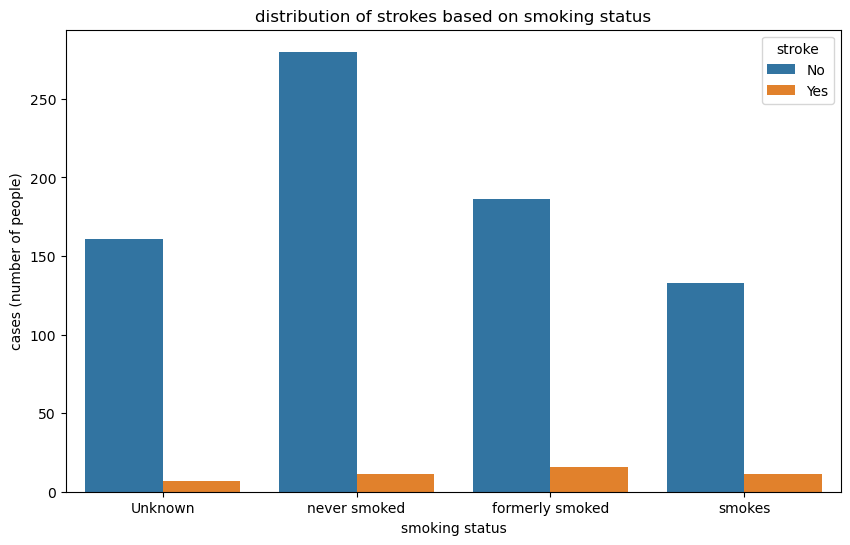

In [12]:
plt.figure(figsize=(10,6))

sns.countplot(data=men_obese, x="smoking_status", hue="stroke")
plt.title("distribution of strokes based on smoking status")
plt.xlabel("smoking status")
plt.ylabel("cases (number of people)")
plt.show()

In [13]:
#Standardizalva

cross_tab = pd.crosstab(men_obese["smoking_status"], men_obese["stroke"], normalize="index")
cross_tab = cross_tab[["Yes", "No"]]
print(cross_tab)
print("-" * 30)

stroke                Yes        No
smoking_status                     
Unknown          0.041667  0.958333
formerly smoked  0.079208  0.920792
never smoked     0.037801  0.962199
smokes           0.076389  0.923611
------------------------------


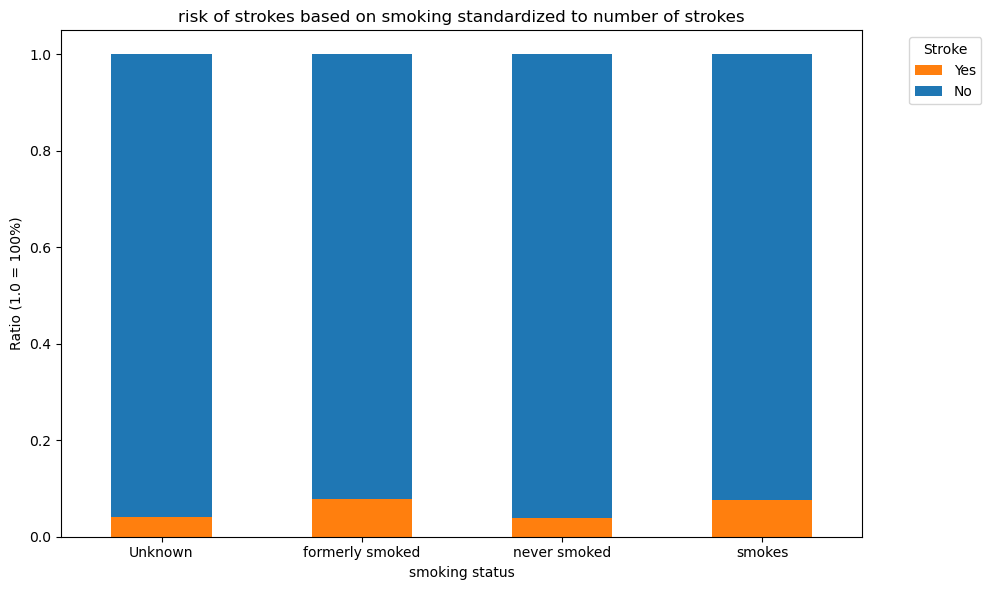

In [14]:
ax = cross_tab.plot(kind="bar", stacked=True, figsize = (10,6), color =['#ff7f0e','#1f77b4' ] )

plt.title("risk of strokes based on smoking standardized to number of strokes")
plt.xlabel("smoking status")
plt.ylabel("Ratio (1.0 = 100%)")

plt.legend(title='Stroke', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
filtered_data = men_obese[men_obese["smoking_status"].isin(["never smoked", "smokes"])]
contingency_table = pd.crosstab(filtered_data["smoking_status"], filtered_data["stroke"])

print("Contigency table (number of cases)")
print(contingency_table)
print("-" * 30)


Contigency table (number of cases)
stroke           No  Yes
smoking_status          
never smoked    280   11
smokes          133   11
------------------------------


In [16]:
filtered_data = men_obese[men_obese["smoking_status"].isin(["smokes", "never smoked"])]
conti = pd.crosstab(filtered_data["smoking_status"], filtered_data["stroke"])

print("number of cases: ")
print(conti)
print("-"*50)

chi2, p_value, dof, expected = chi2_contingency(conti)

print(f"P-value: {p_value:.5f}")

print("-" * 30)

# 4. Értelmezés
if p_value < 0.05:
    print("RESULT: There is significant connection")
    print(r"the difference of the 2 groups are not by randomness (95% sure)")
else:  
    print("RESULT: There is no significant difference")

number of cases: 
stroke           No  Yes
smoking_status          
never smoked    280   11
smokes          133   11
--------------------------------------------------
P-value: 0.13468
------------------------------
RESULT: There is no significant difference


In [17]:
print(stroke_age_sorted.isnull().sum())

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64


In [18]:
print(stroke_age_sorted.shape)
bmi_glucose_data = stroke_age_sorted.copy()
bmi_glucose_data = bmi_glucose_data.dropna(subset=['bmi'])

print(f"original dataset: {stroke_age_sorted.shape}")
print(f"size of the dataset used for the bmi: {bmi_glucose_data.shape}")



(5110, 11)
original dataset: (5110, 11)
size of the dataset used for the bmi: (4909, 11)


<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

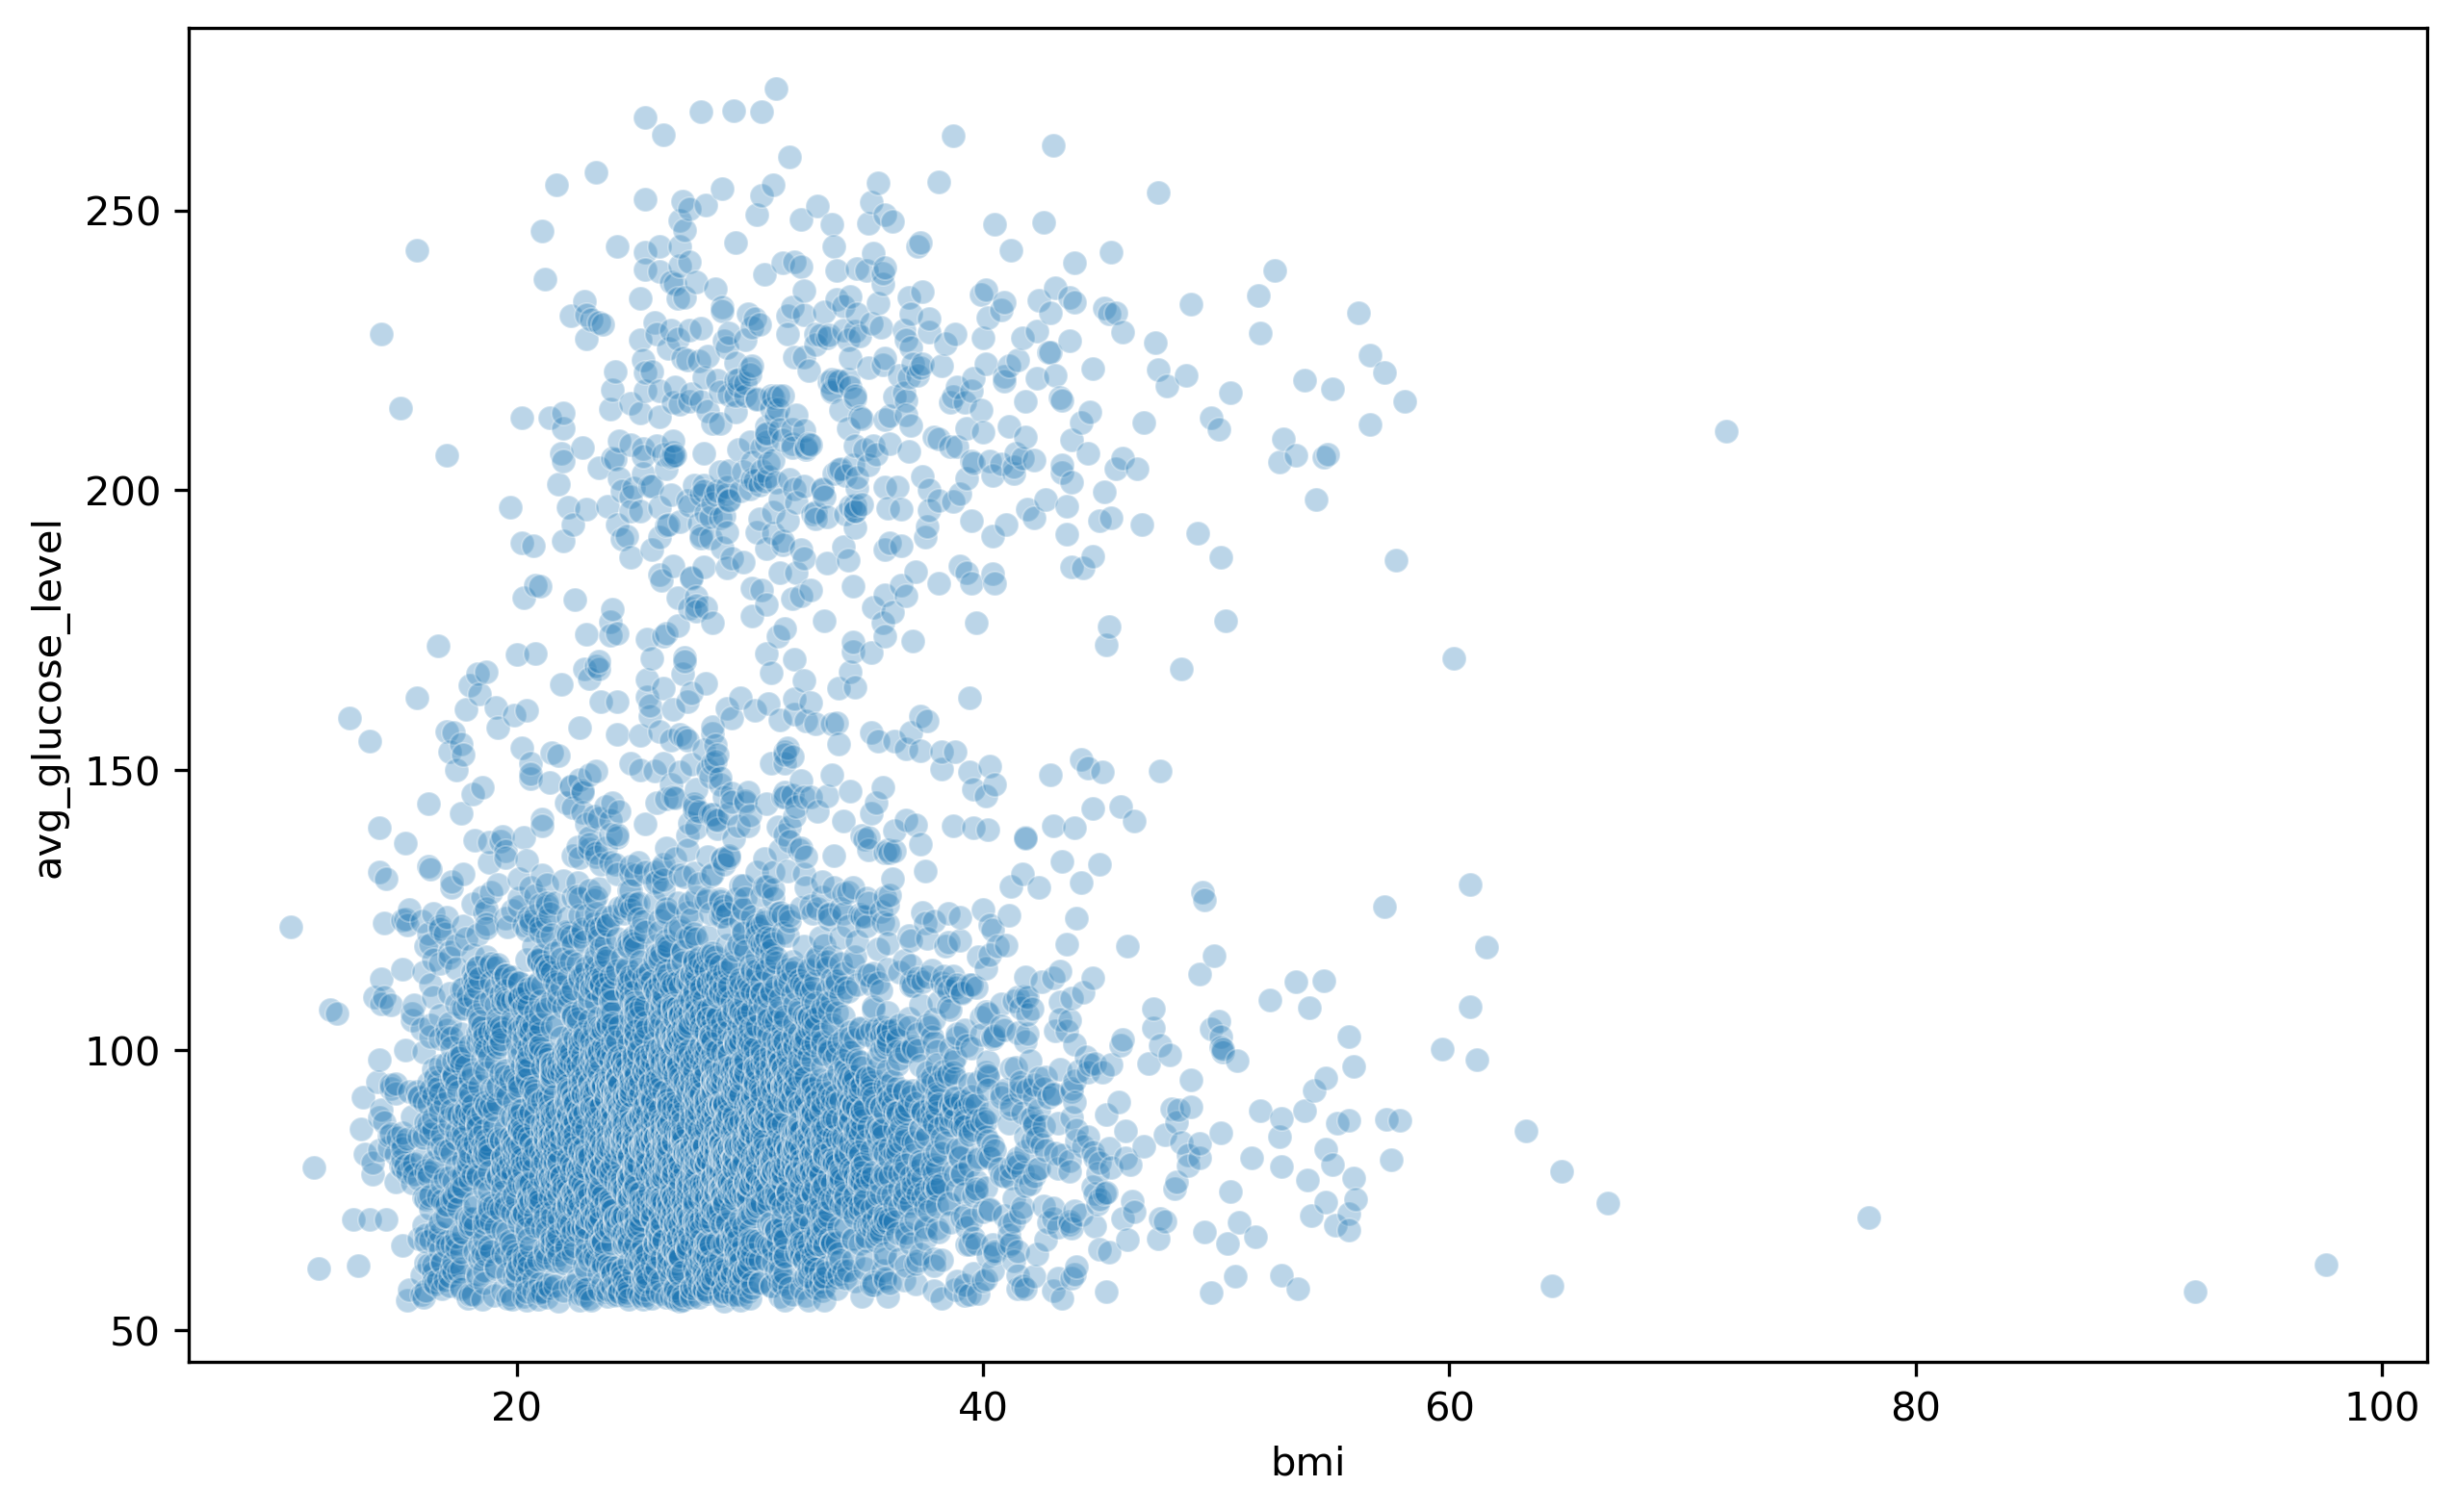

In [19]:
plt.figure(figsize=(10, 6), dpi=300)

sns.scatterplot(data=bmi_glucose_data, x="bmi", y="avg_glucose_level", alpha=0.3)


#in the future for downsampling try LTTB algorithm!

In [20]:
correlation=bmi_glucose_data[["bmi", "avg_glucose_level"]].corr()
print(correlation)

                        bmi  avg_glucose_level
bmi                1.000000           0.175502
avg_glucose_level  0.175502           1.000000


<Axes: ylabel='bmi'>

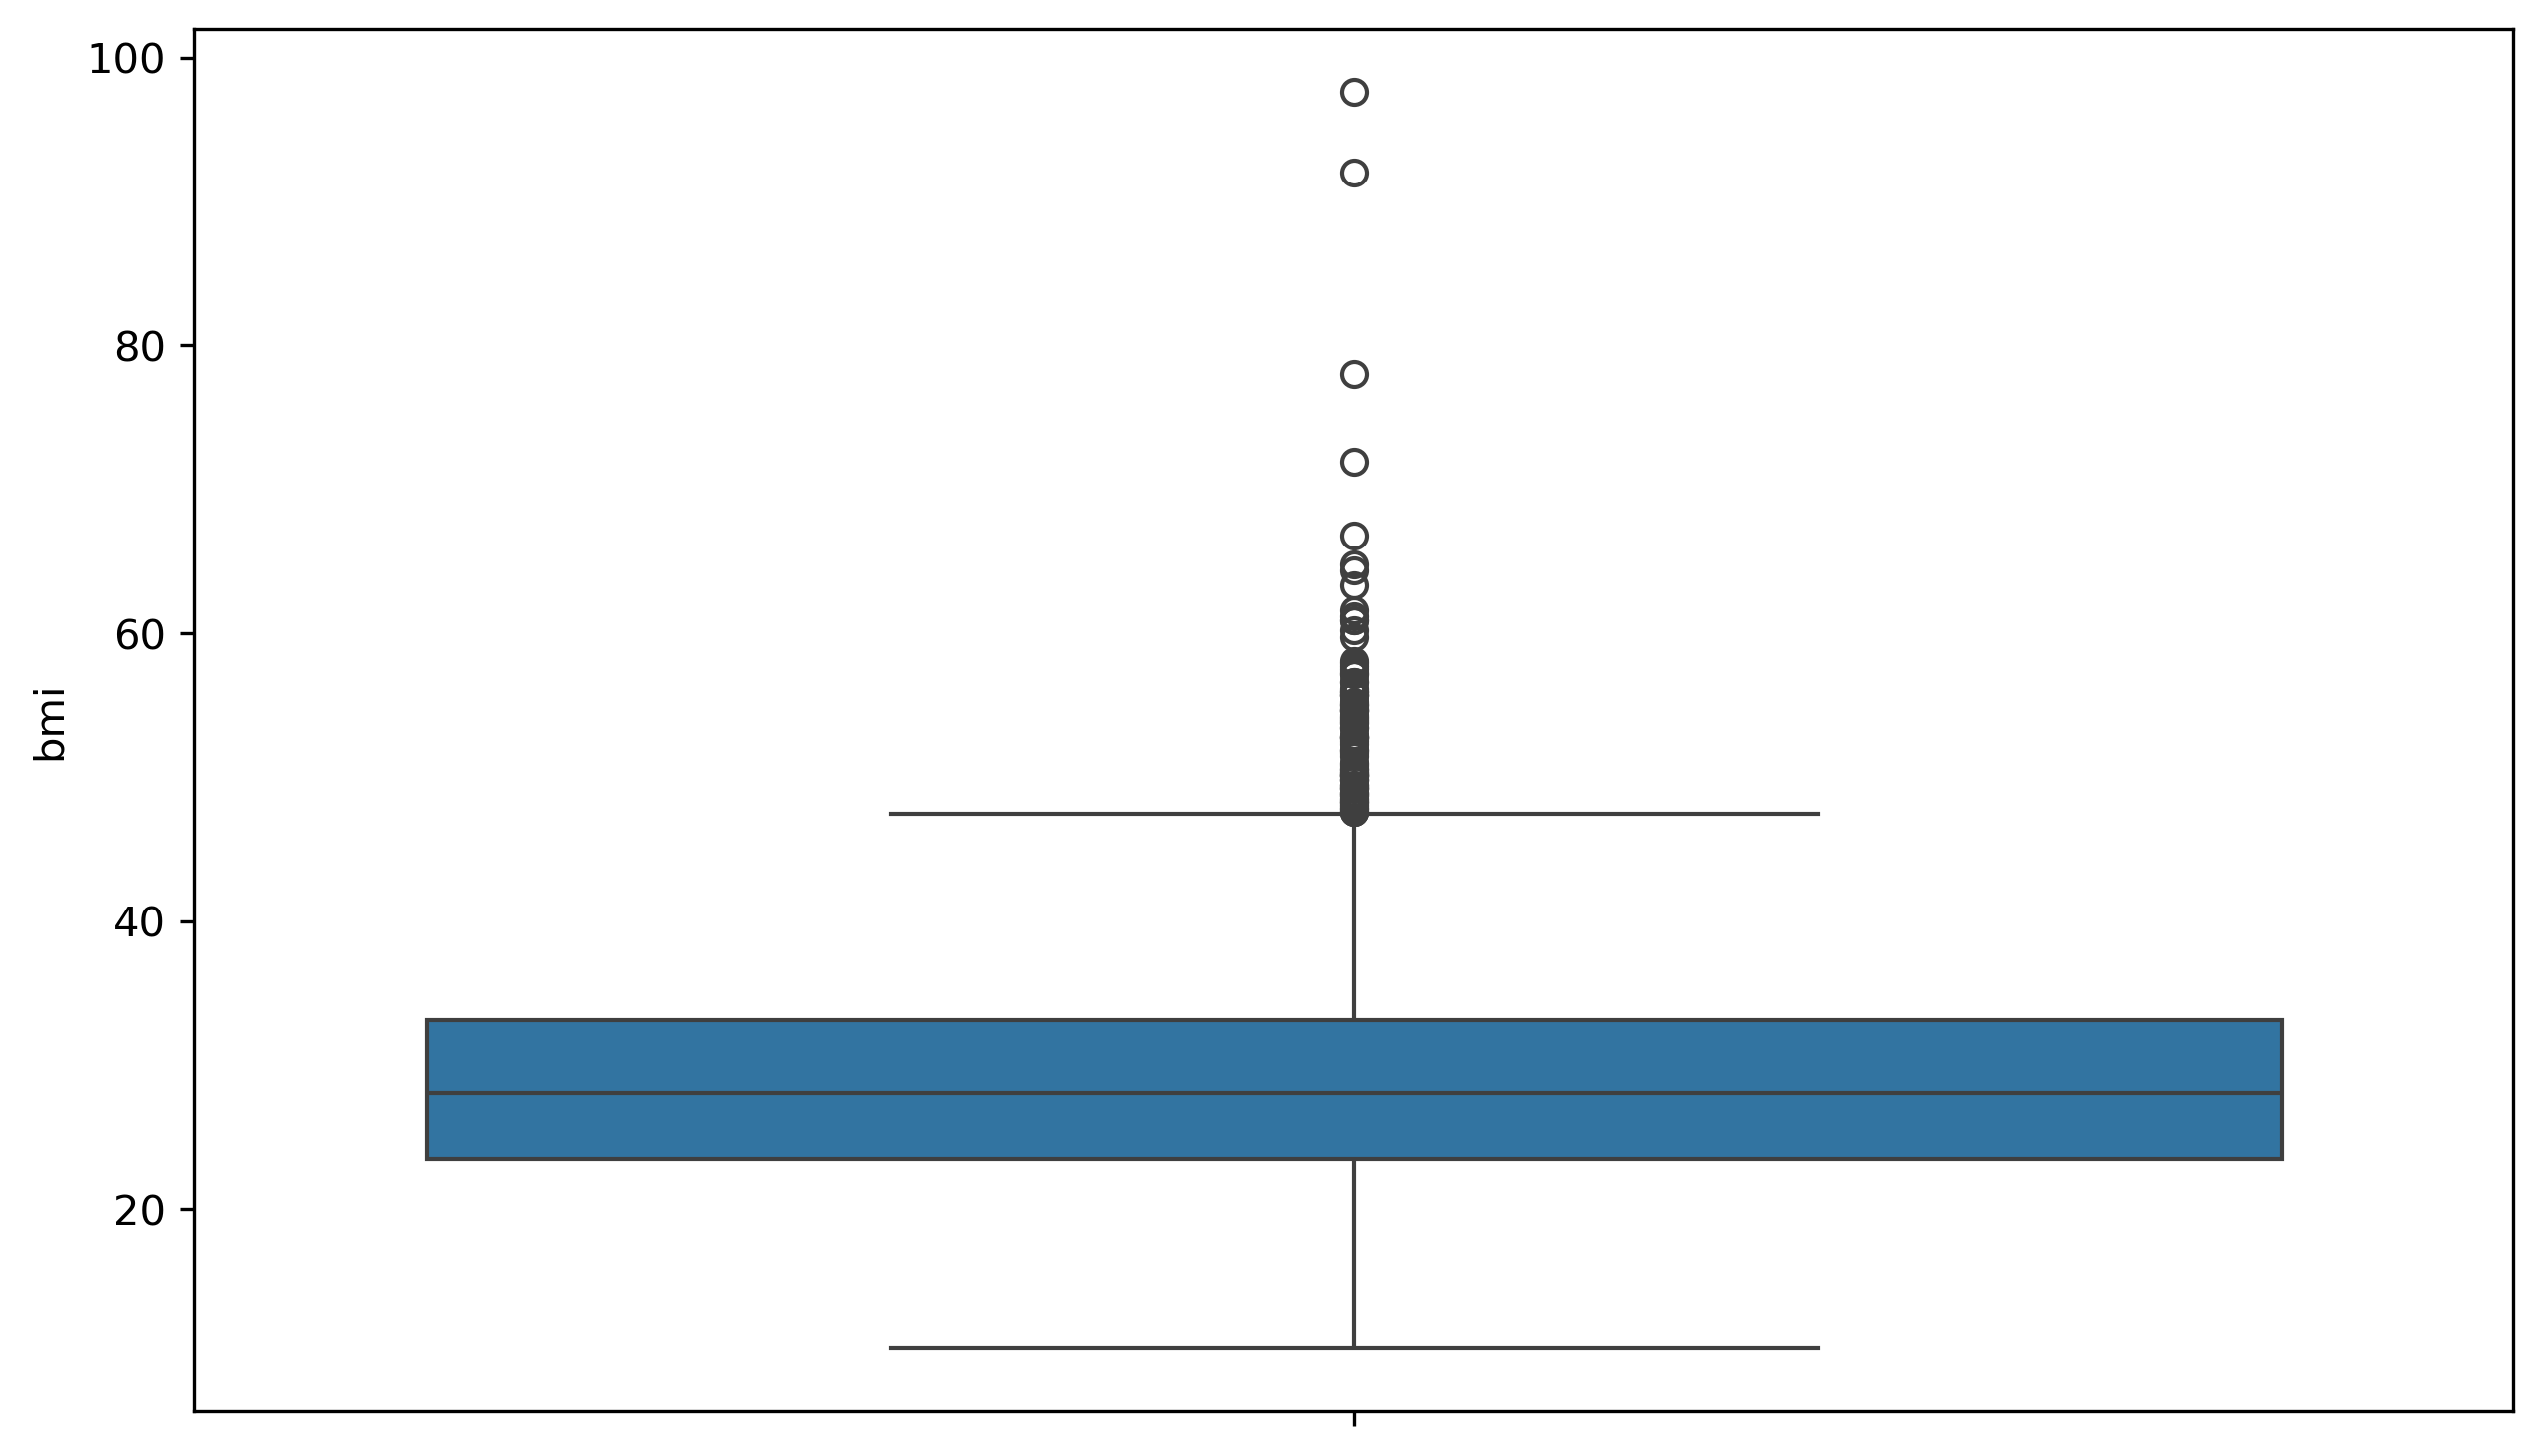

In [21]:
plt.figure(figsize=(10,6), dpi=300)
sns.boxplot(data=bmi_glucose_data, y="bmi")



In [22]:
bmi_glucose_data_filtered=bmi_glucose_data[bmi_glucose_data["bmi"] <=60]
bmi_glucose_data.shape

(4909, 11)

<Axes: ylabel='bmi'>

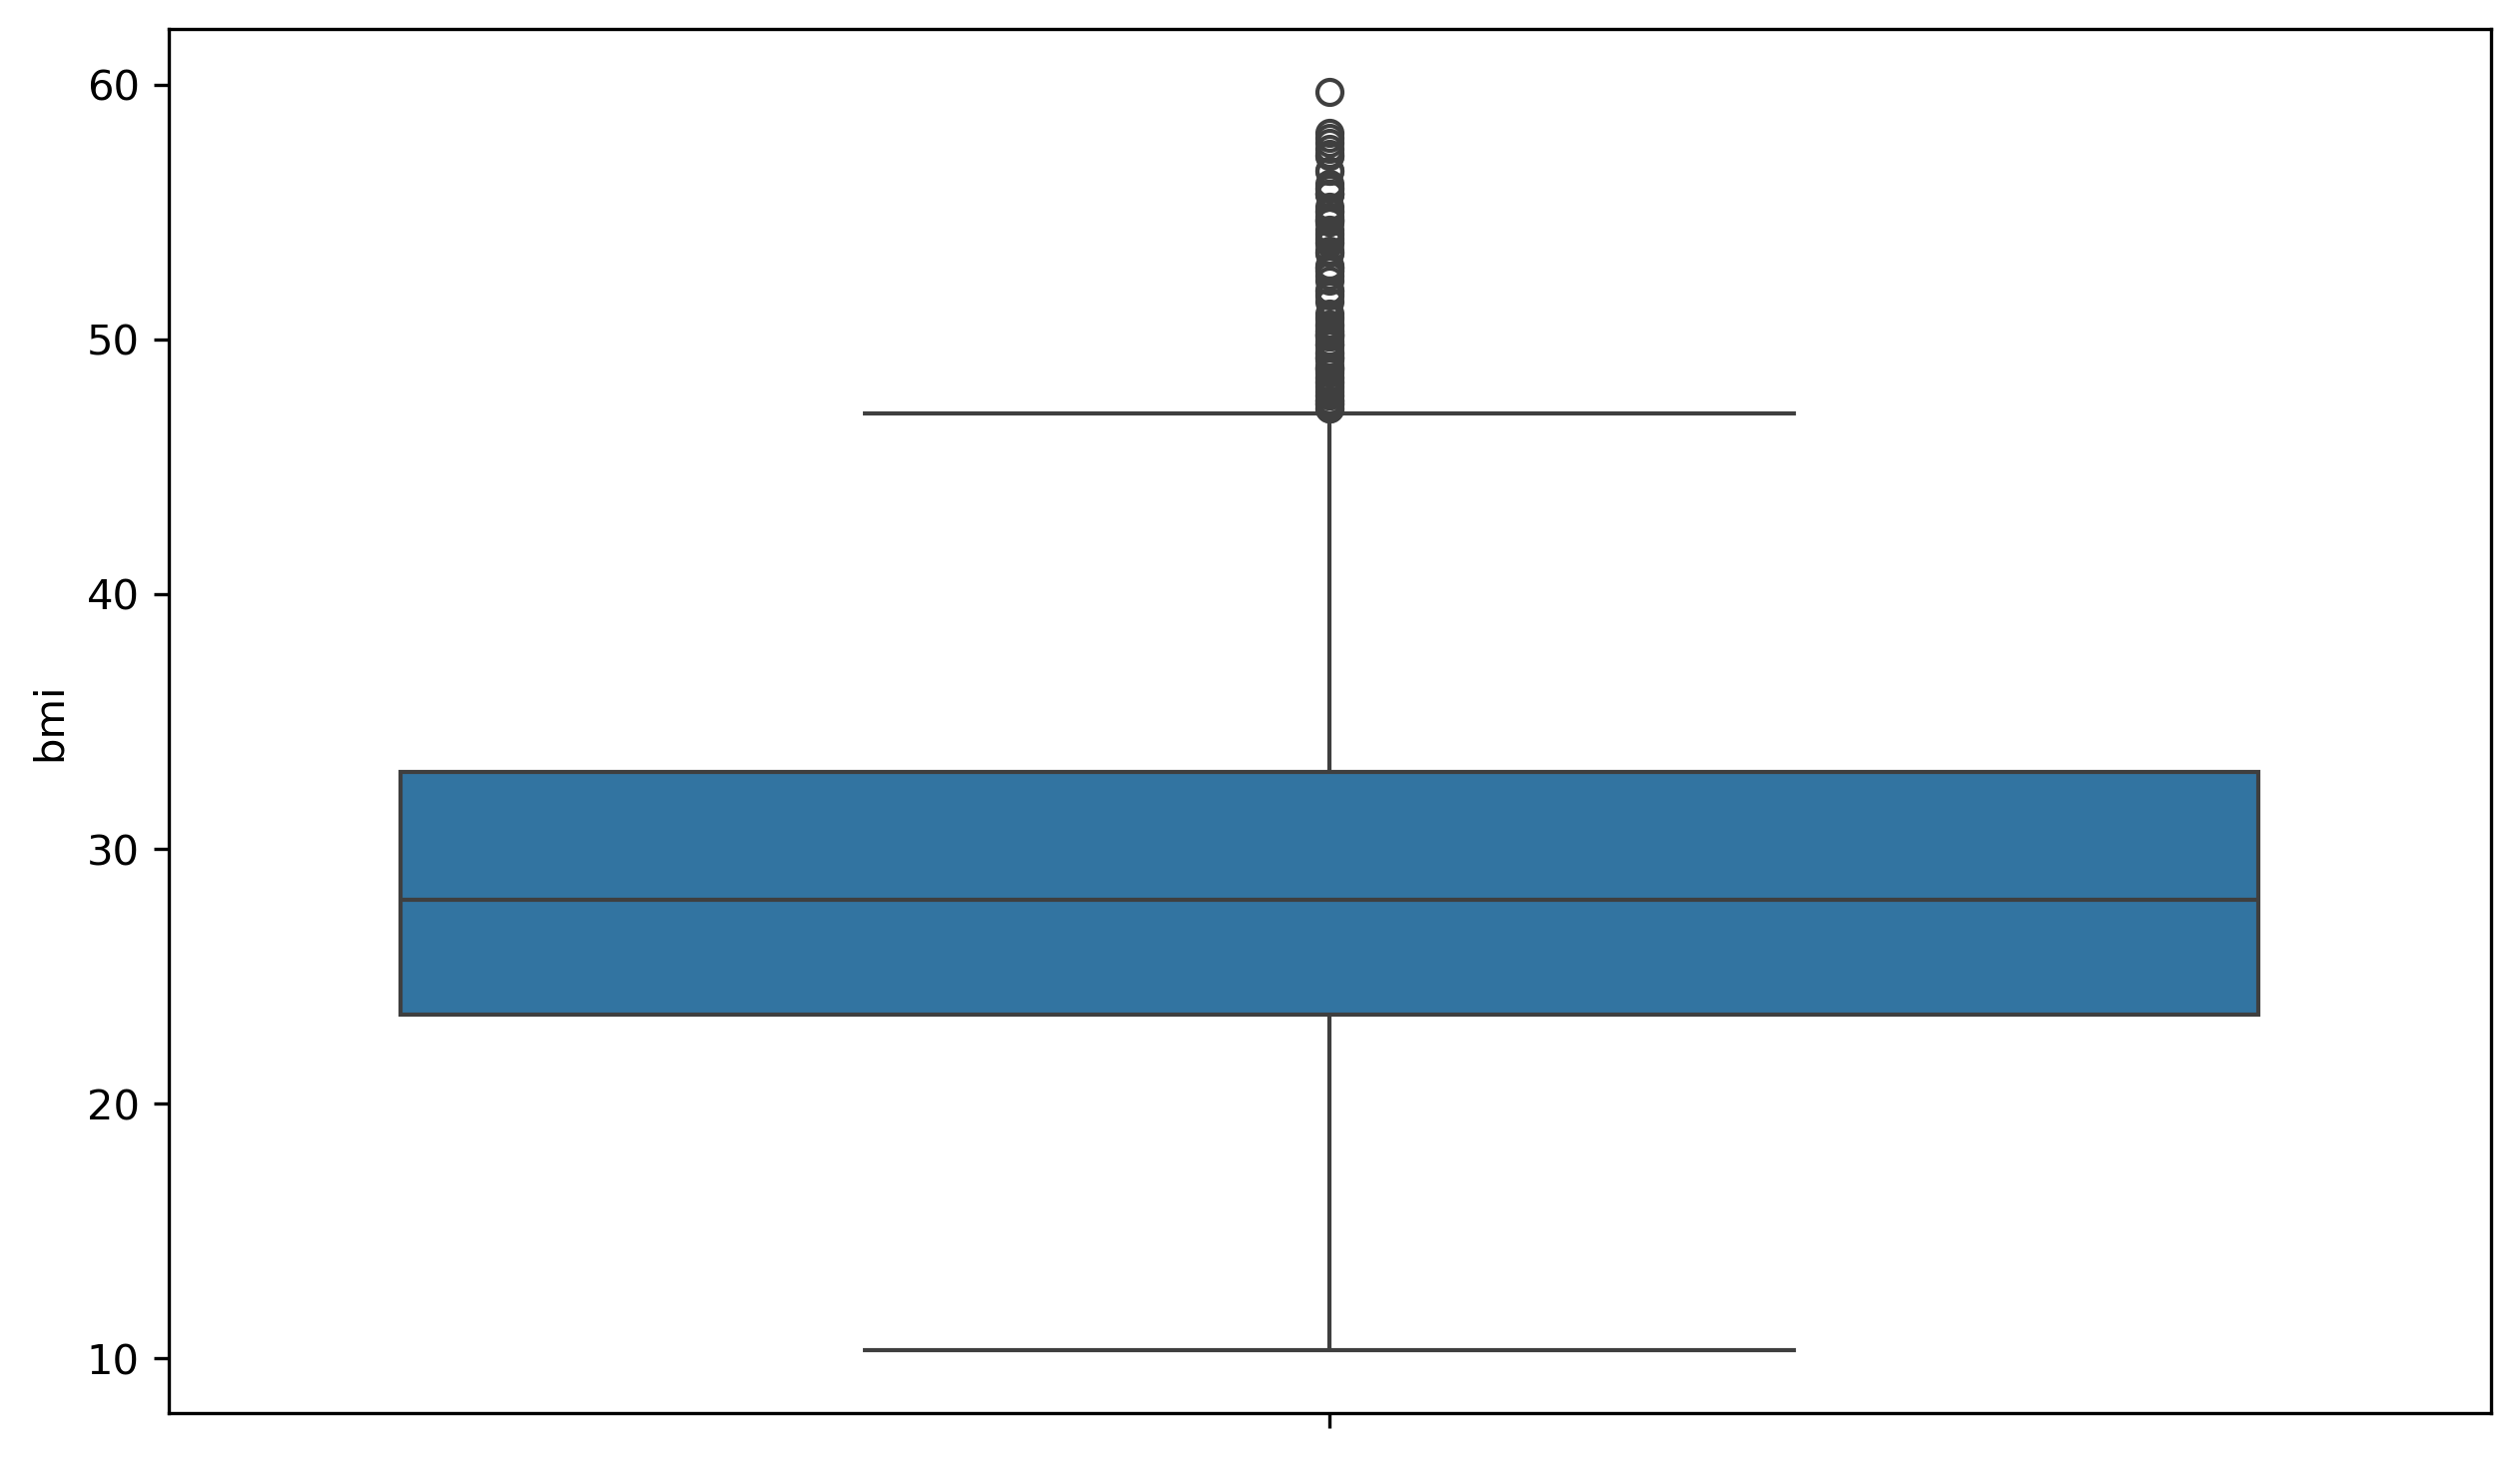

In [23]:
plt.figure(figsize=(10,6), dpi=300)
sns.boxplot(data=bmi_glucose_data_filtered, y="bmi")

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

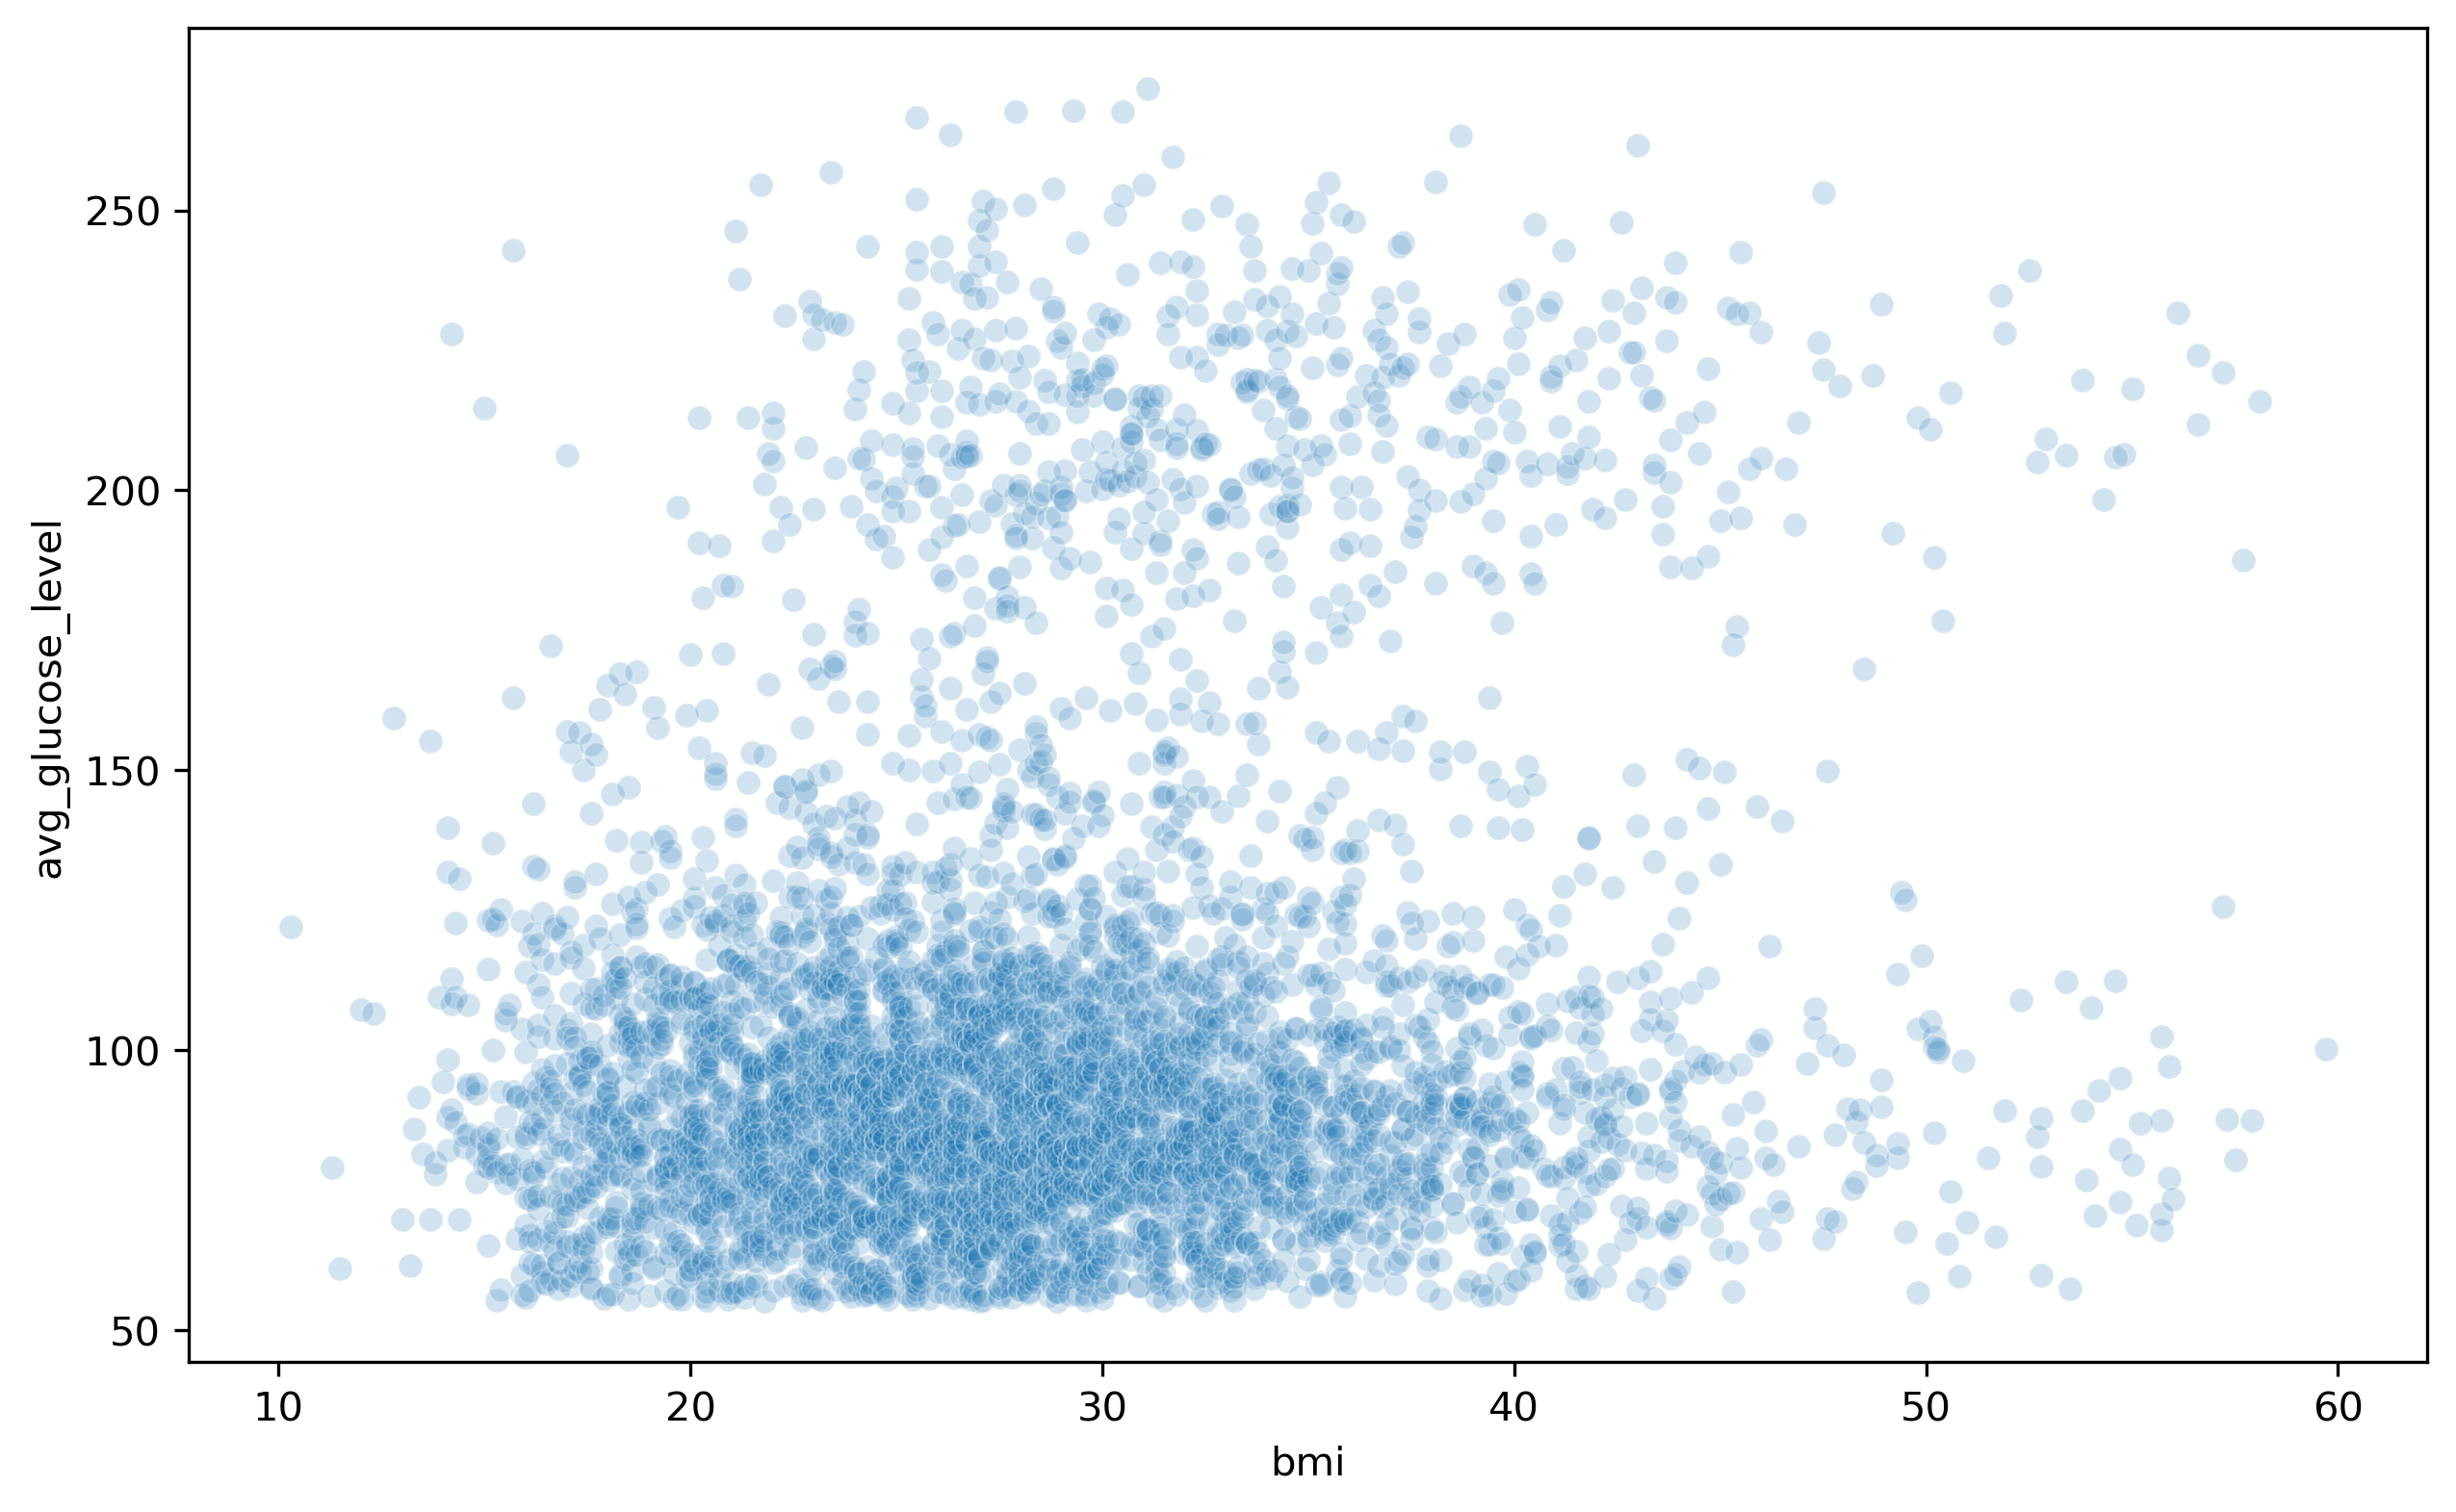

In [24]:
plt.figure(figsize=(10,6), dpi=300)
sns.scatterplot(data=bmi_glucose_data_filtered, x="bmi", y="avg_glucose_level", alpha=0.2)

In [25]:
newcorrelation= bmi_glucose_data_filtered[["bmi", "avg_glucose_level"]].corr()
print(newcorrelation)   

                       bmi  avg_glucose_level
bmi                1.00000            0.18582
avg_glucose_level  0.18582            1.00000


<Axes: xlabel='gender', ylabel='avg_glucose_level'>

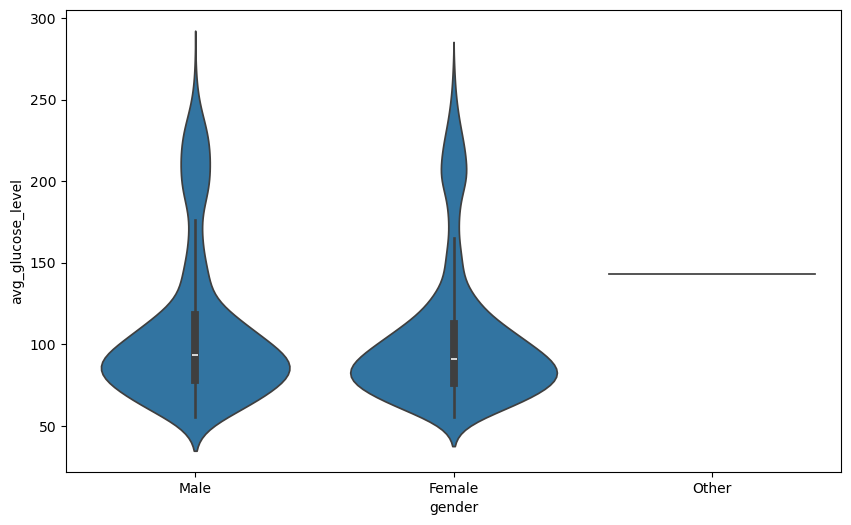

In [26]:
plt.figure(figsize=(10,6))
sns.violinplot(data=stroke, x="gender", y="avg_glucose_level")


----- Exact numbers ----- 
        count        mean  median
gender                           
Female   2897  103.329914   90.52
Male     2011  108.131721   93.51
Other       1  143.330000  143.33
------------------------------


C:\Users\Molnár Szabolcs\AppData\Local\Temp\ipykernel_39292\3724599877.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=bmi_glucose_data, x="gender", y="avg_glucose_level",
C:\Users\Molnár Szabolcs\AppData\Local\Temp\ipykernel_39292\3724599877.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(name_titles)


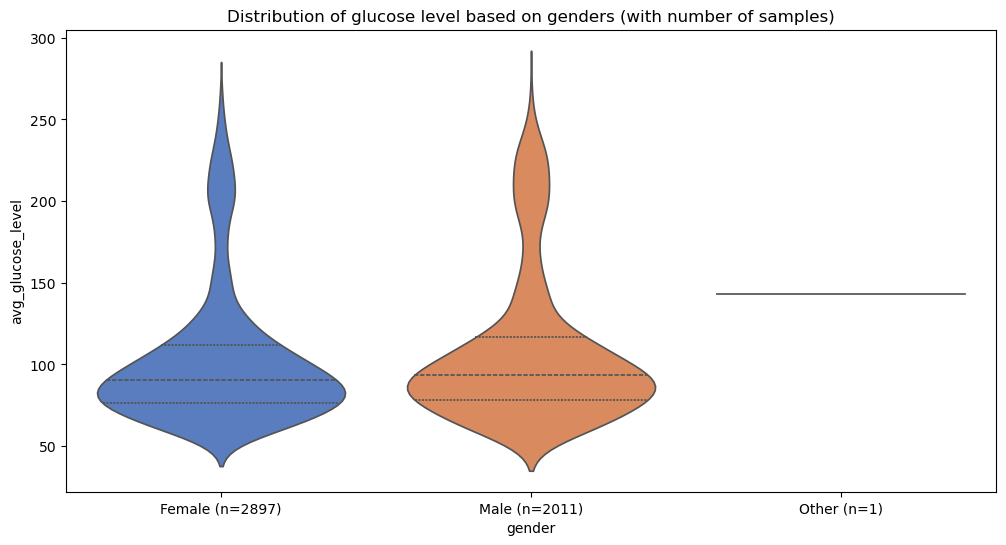

In [27]:
stat_summary = bmi_glucose_data.groupby("gender")["avg_glucose_level"].agg(['count', 'mean', 'median'])

print("----- Exact numbers ----- ")
print(stat_summary)
print("-" * 30)


name_titles = [f"{nem} (n={db})" for nem, db in zip(stat_summary.index, stat_summary['count'])]

plt.figure(figsize=(12, 6))

ax = sns.violinplot(data=bmi_glucose_data, x="gender", y="avg_glucose_level", 
                    inner="quart", palette="muted")


ax.set_xticklabels(name_titles)

plt.title("Distribution of glucose level based on genders (with number of samples)")
plt.show()

In [28]:
male_glucose=bmi_glucose_data_filtered["avg_glucose_level"][bmi_glucose_data_filtered["gender"] == "Male"]
print(male_glucose)

female_glucose=bmi_glucose_data_filtered["avg_glucose_level"][bmi_glucose_data_filtered["gender"] == "Female"]
print(female_glucose.shape)

id
59993     60.96
41500     69.79
4789      91.54
56410     81.42
60926     79.89
          ...  
16245    211.83
2898      87.66
25405    187.52
32604    215.81
23047    100.16
Name: avg_glucose_level, Length: 2007, dtype: float64
(2888,)


In [29]:
print(bmi_glucose_data_filtered.loc[59993])

gender                       Male
age                          40.0
hypertension                   No
heart_disease                  No
ever_married                  Yes
work_type                 Private
Residence_type              Rural
avg_glucose_level           60.96
bmi                          11.5
smoking_status       never smoked
stroke                         No
Name: 59993, dtype: object


In [30]:
t_stat, p_value= ttest_ind(a=male_glucose, b=female_glucose )

#print(t_stat)
#print(p_value)
   
print(f"p value = {p_value:.5f}; meaning p < 0.05 so the probability is smal that its the case of randomness, so the difference is real, h0 decline, and h1 accept")
print(f"t_stat erteke= {t_stat:.5f}")



p value = 0.00019; meaning p < 0.05 so the probability is smal that its the case of randomness, so the difference is real, h0 decline, and h1 accept
t_stat erteke= 3.72870


In [31]:
print(f"male mean:  {male_glucose.mean():.3f}")
print(f"female mean:    {female_glucose.mean():.3f}")
print(f"mean diff = {male_glucose.mean() - female_glucose.mean():.2f}")

male mean:  108.144
female mean:    103.337
mean diff = 4.81


Text(0.5, 0, 'Distribution of Female glucose level')

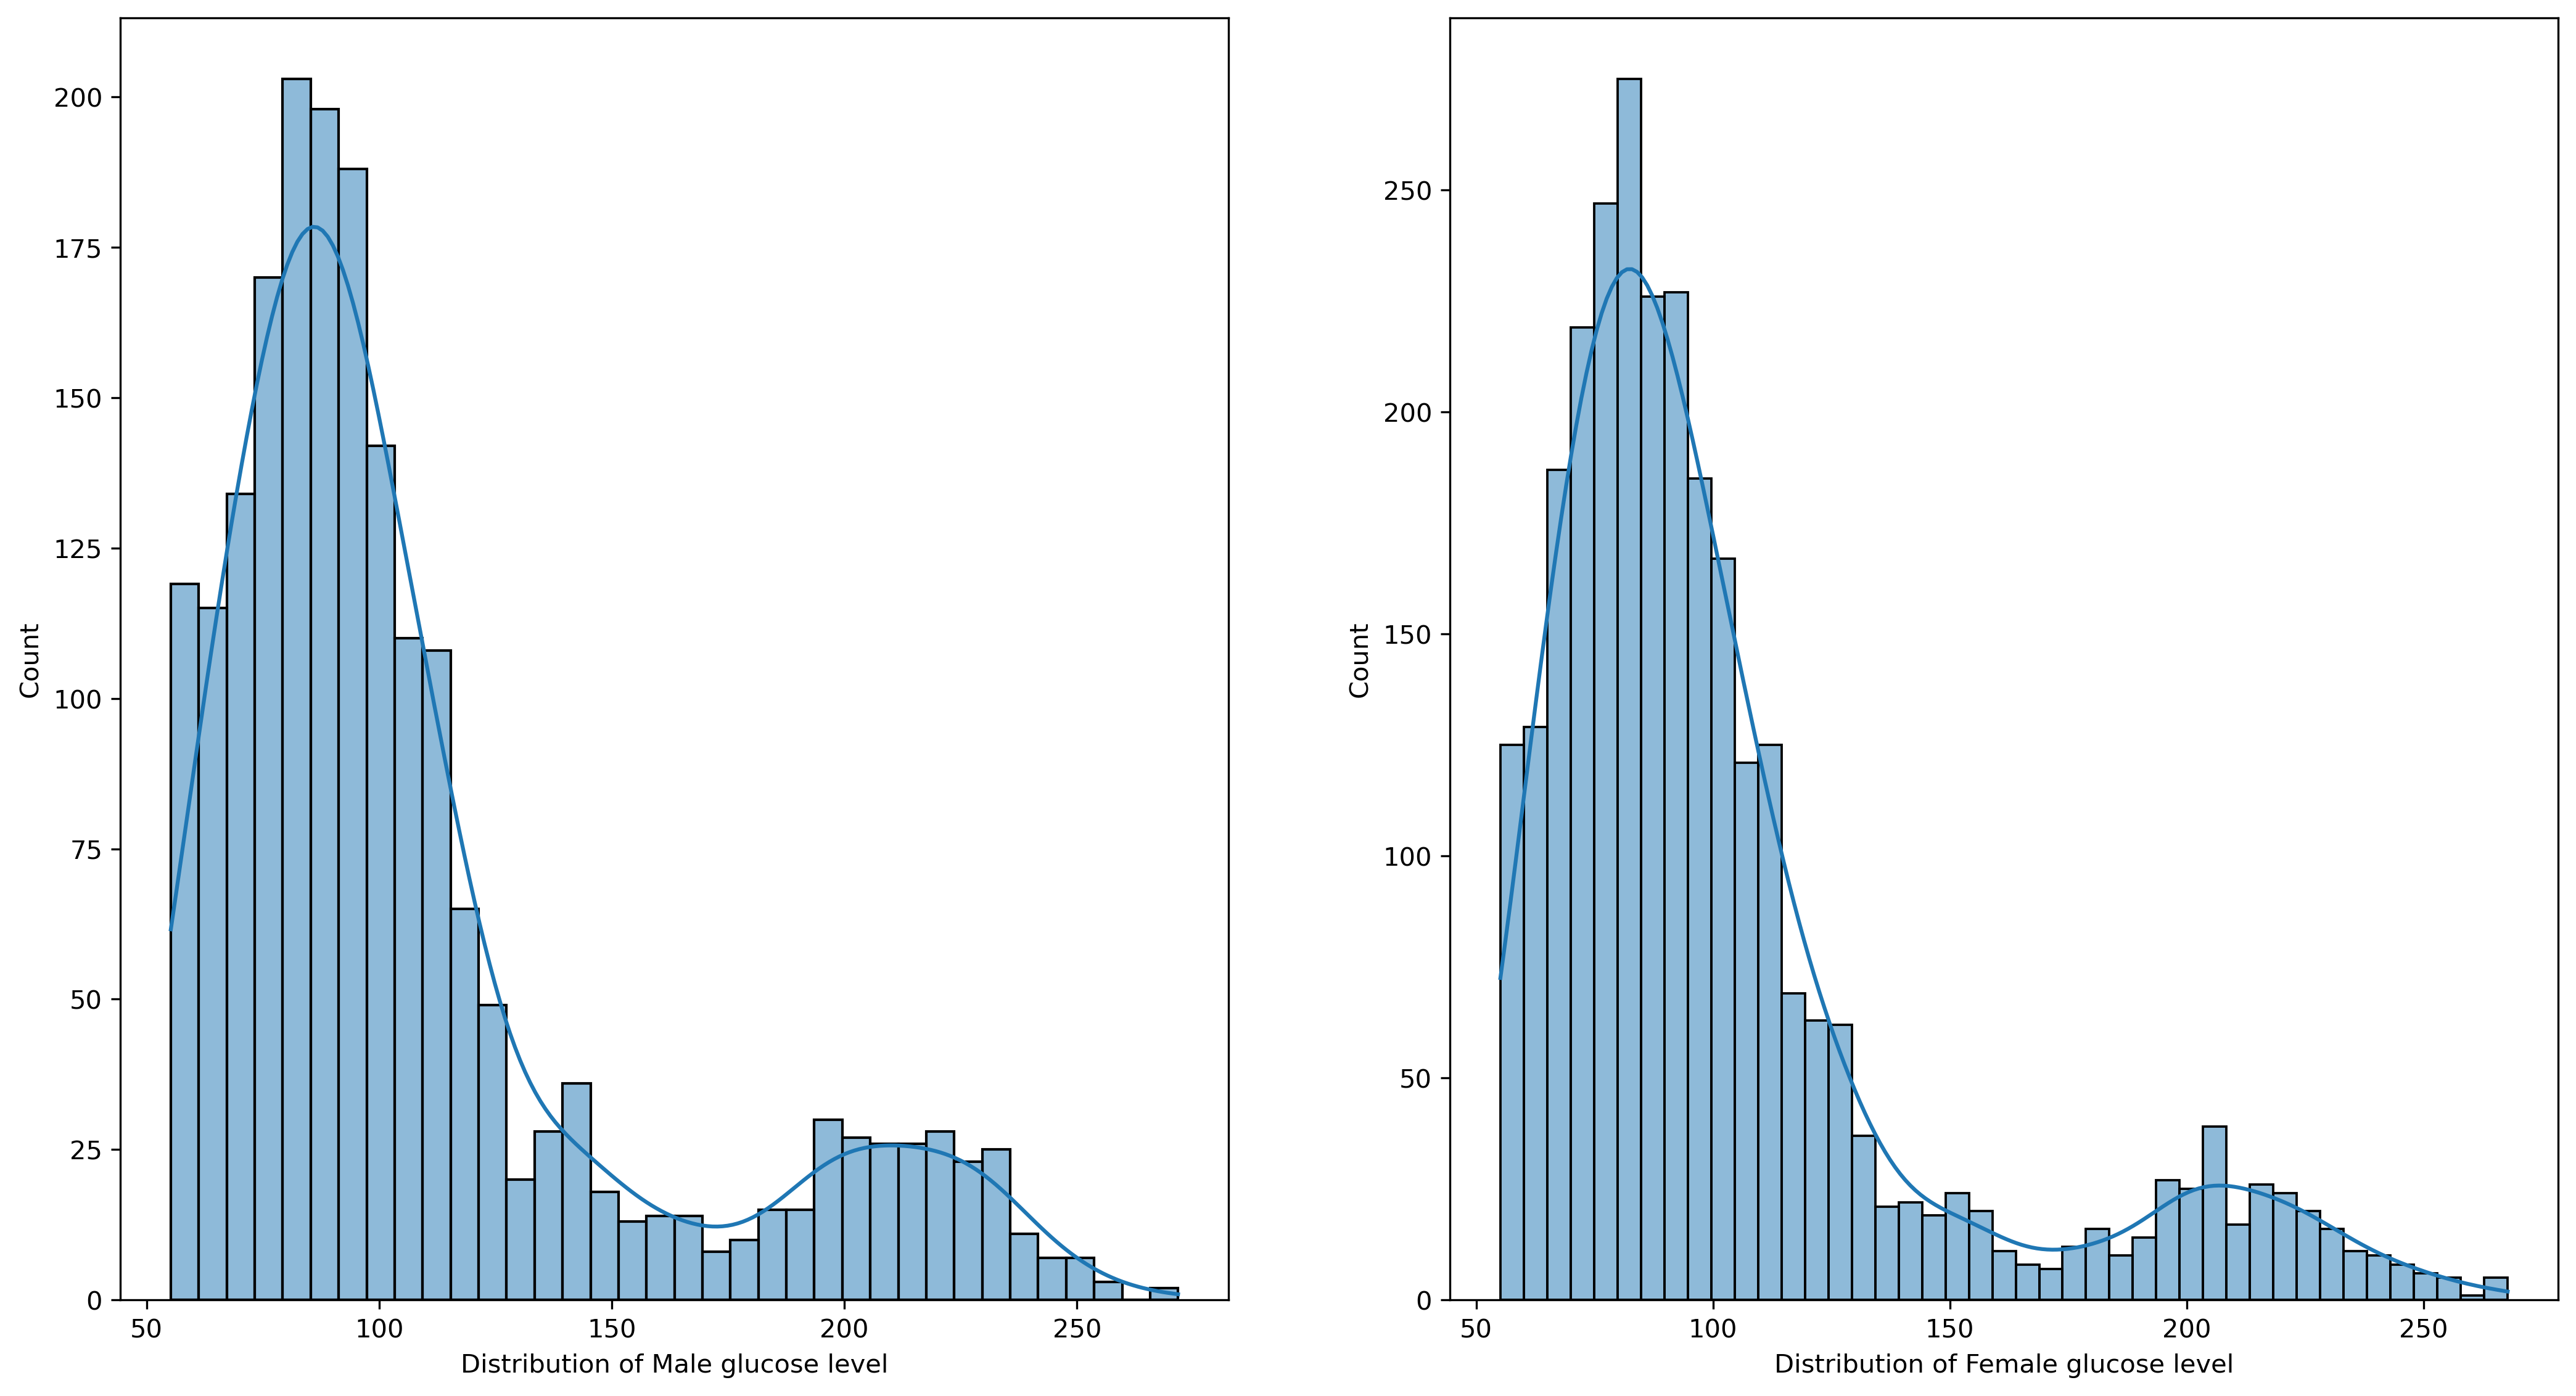

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(17,9), dpi=300)
sns.histplot(data=male_glucose, kde=True, ax=ax[0])
sns.histplot(data=female_glucose, kde=True, ax=ax[1])

ax[0].set_xlabel("Distribution of Male glucose level")
ax[1].set_xlabel("Distribution of Female glucose level")




Text(0, 0.5, 'Glucose level')

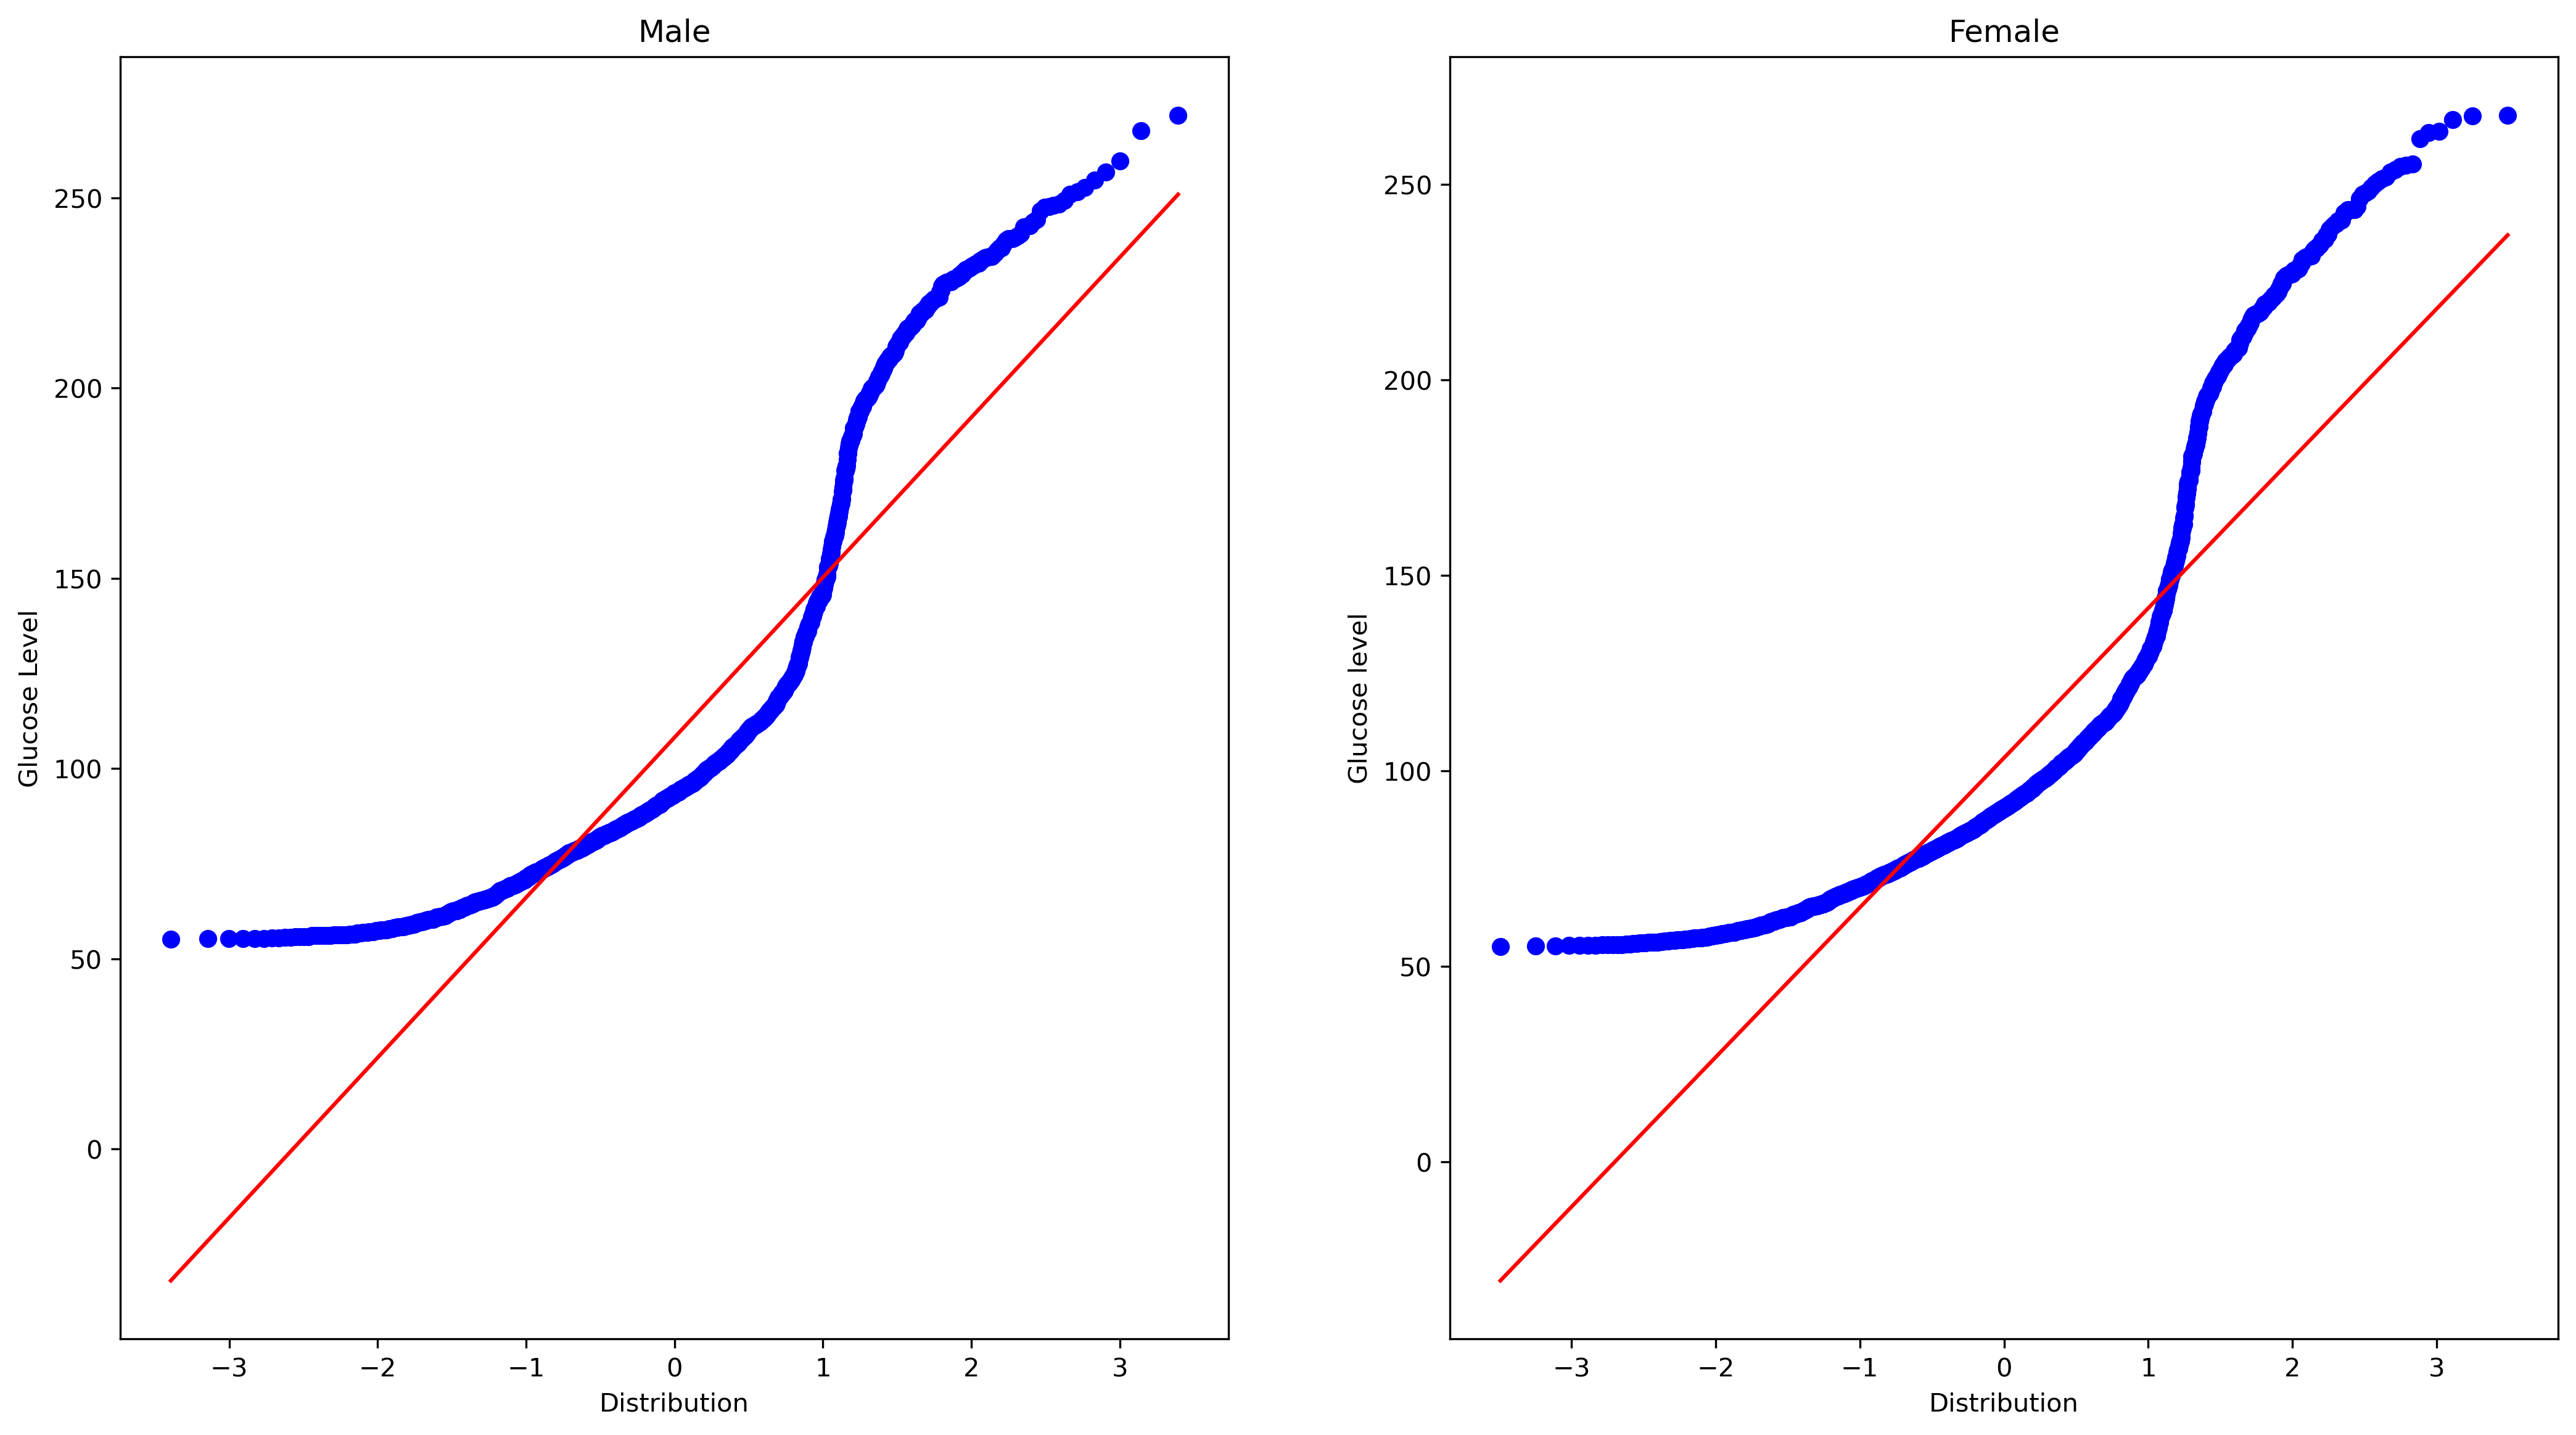

In [33]:
fig, ax=(plt.subplots(nrows=1, ncols=2, figsize=(17,9), dpi=300))
stats.probplot(x=male_glucose, dist="norm", plot=ax[0])
stats.probplot(female_glucose, dist="norm", plot=ax[1])
ax[0].set_xlabel("Distribution")
ax[0].set_title("Male")
ax[0].set_ylabel("Glucose Level")

ax[1].set_xlabel("Distribution")
ax[1].set_title("Female")
ax[1].set_ylabel("Glucose level")

In [34]:
male_shap, male_p = stats.shapiro(male_glucose)
women_shap, women_p= stats.shapiro(female_glucose)



print(f"Male shapiro result: {male_p:.10f}\n women shapiro result: {women_p:.10f}")

Male shapiro result: 0.0000000000
 women shapiro result: 0.0000000000


In [35]:
makingsure, makingsure_p=stats.mannwhitneyu(male_glucose, female_glucose)


if makingsure_p < 0.05:
     print(f"The result of the more robust Mann-Whitney U test (which does not assume normality) (p-value): {makingsure_p:.5f}\n This means that since p < 0.05, the difference in glucose level distribution between genders is SIGNIFICANT (even in the absence of normal distribution).")
else:
     print(f"The result of the more robust Mann-Whitney U test \n(which does not assume normality) (p-value): {makingsure_p:.5f}\n This means that since p > 0.05, the difference in glucose level distribution between genders is NOT significant")

The result of the more robust Mann-Whitney U test (which does not assume normality) (p-value): 0.00052
 This means that since p < 0.05, the difference in glucose level distribution between genders is SIGNIFICANT (even in the absence of normal distribution).


In [36]:
df_clean = stroke.copy()
df_clean.isnull().sum()
df_clean


gender   age hypertension heart_disease ever_married      work_type  \
id                                                                           
9046     Male  67.0           No           Yes          Yes        Private   
51676  Female  61.0           No            No          Yes  Self-employed   
31112    Male  80.0           No           Yes          Yes        Private   
60182  Female  49.0           No            No          Yes        Private   
1665   Female  79.0          Yes            No          Yes  Self-employed   
...       ...   ...          ...           ...          ...            ...   
18234  Female  80.0          Yes            No          Yes        Private   
44873  Female  81.0           No            No          Yes  Self-employed   
19723  Female  35.0           No            No          Yes  Self-employed   
37544    Male  51.0           No            No          Yes        Private   
44679  Female  44.0           No            No          Yes       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status stroke  
id                                                                     
9046           Urban             228.69  36.6  formerly smoked    Yes  
51676          Rural             202.21   NaN     never smoked    Yes  
31112          Rural             105.92  32.5     never smoked    Yes  
60182          Urban             171.23  34.4           smokes    Yes  
1665           Rural             174.12  24.0     never smoked    Yes  
...              ...                ...   ...              ...    ...  
18234          Urban              83.75   NaN     never smoked     No  
44873          Urban             125.20  40.0     never smoked     No  
19723          Rural              82.99  30.6     never smoked     No  
37544          Rural             166.29  25.6  formerly smoked     No  
44679          Urban              85.28  26.2              NaN     No  

[5110 rows x 11 columns]

In [37]:
bmi_median = df_clean["bmi"].median()
df_clean["bmi"]=df_clean["bmi"].fillna(bmi_median)
print(bmi_median)
df_clean["smoking_status"] = df_clean["smoking_status"].fillna("Unknown")
df_clean.shape


28.1


(5110, 11)

In [38]:
df_clean = df_clean[df_clean["gender"] != "Other"]
df_clean.shape

(5109, 11)

In [39]:
df_clean_ml = df_clean.copy()
#df_clean_ml = df_clean_ml.drop(columns="id")

df_clean_ml = pd.get_dummies(data=df_clean, drop_first=True, dtype=int)
print(df_clean_ml.head(5))

        age  avg_glucose_level   bmi  gender_Male  hypertension_Yes  \
id                                                                    
9046   67.0             228.69  36.6            1                 0   
51676  61.0             202.21  28.1            0                 0   
31112  80.0             105.92  32.5            1                 0   
60182  49.0             171.23  34.4            0                 0   
1665   79.0             174.12  24.0            0                 1   

       heart_disease_Yes  ever_married_Yes  work_type_Never_worked  \
id                                                                   
9046                   1                 1                       0   
51676                  0                 1                       0   
31112                  1                 1                       0   
60182                  0                 1                       0   
1665                   0                 1                       0   

       work

In [40]:
df_clean_ml
X = df_clean_ml.drop(columns="stroke_Yes")
y = df_clean_ml["stroke_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(4087, 15)
(1022, 15)


In [41]:
model = RandomForestClassifier(random_state=42,class_weight='balanced').fit(X=X_train, y=y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9393346379647749

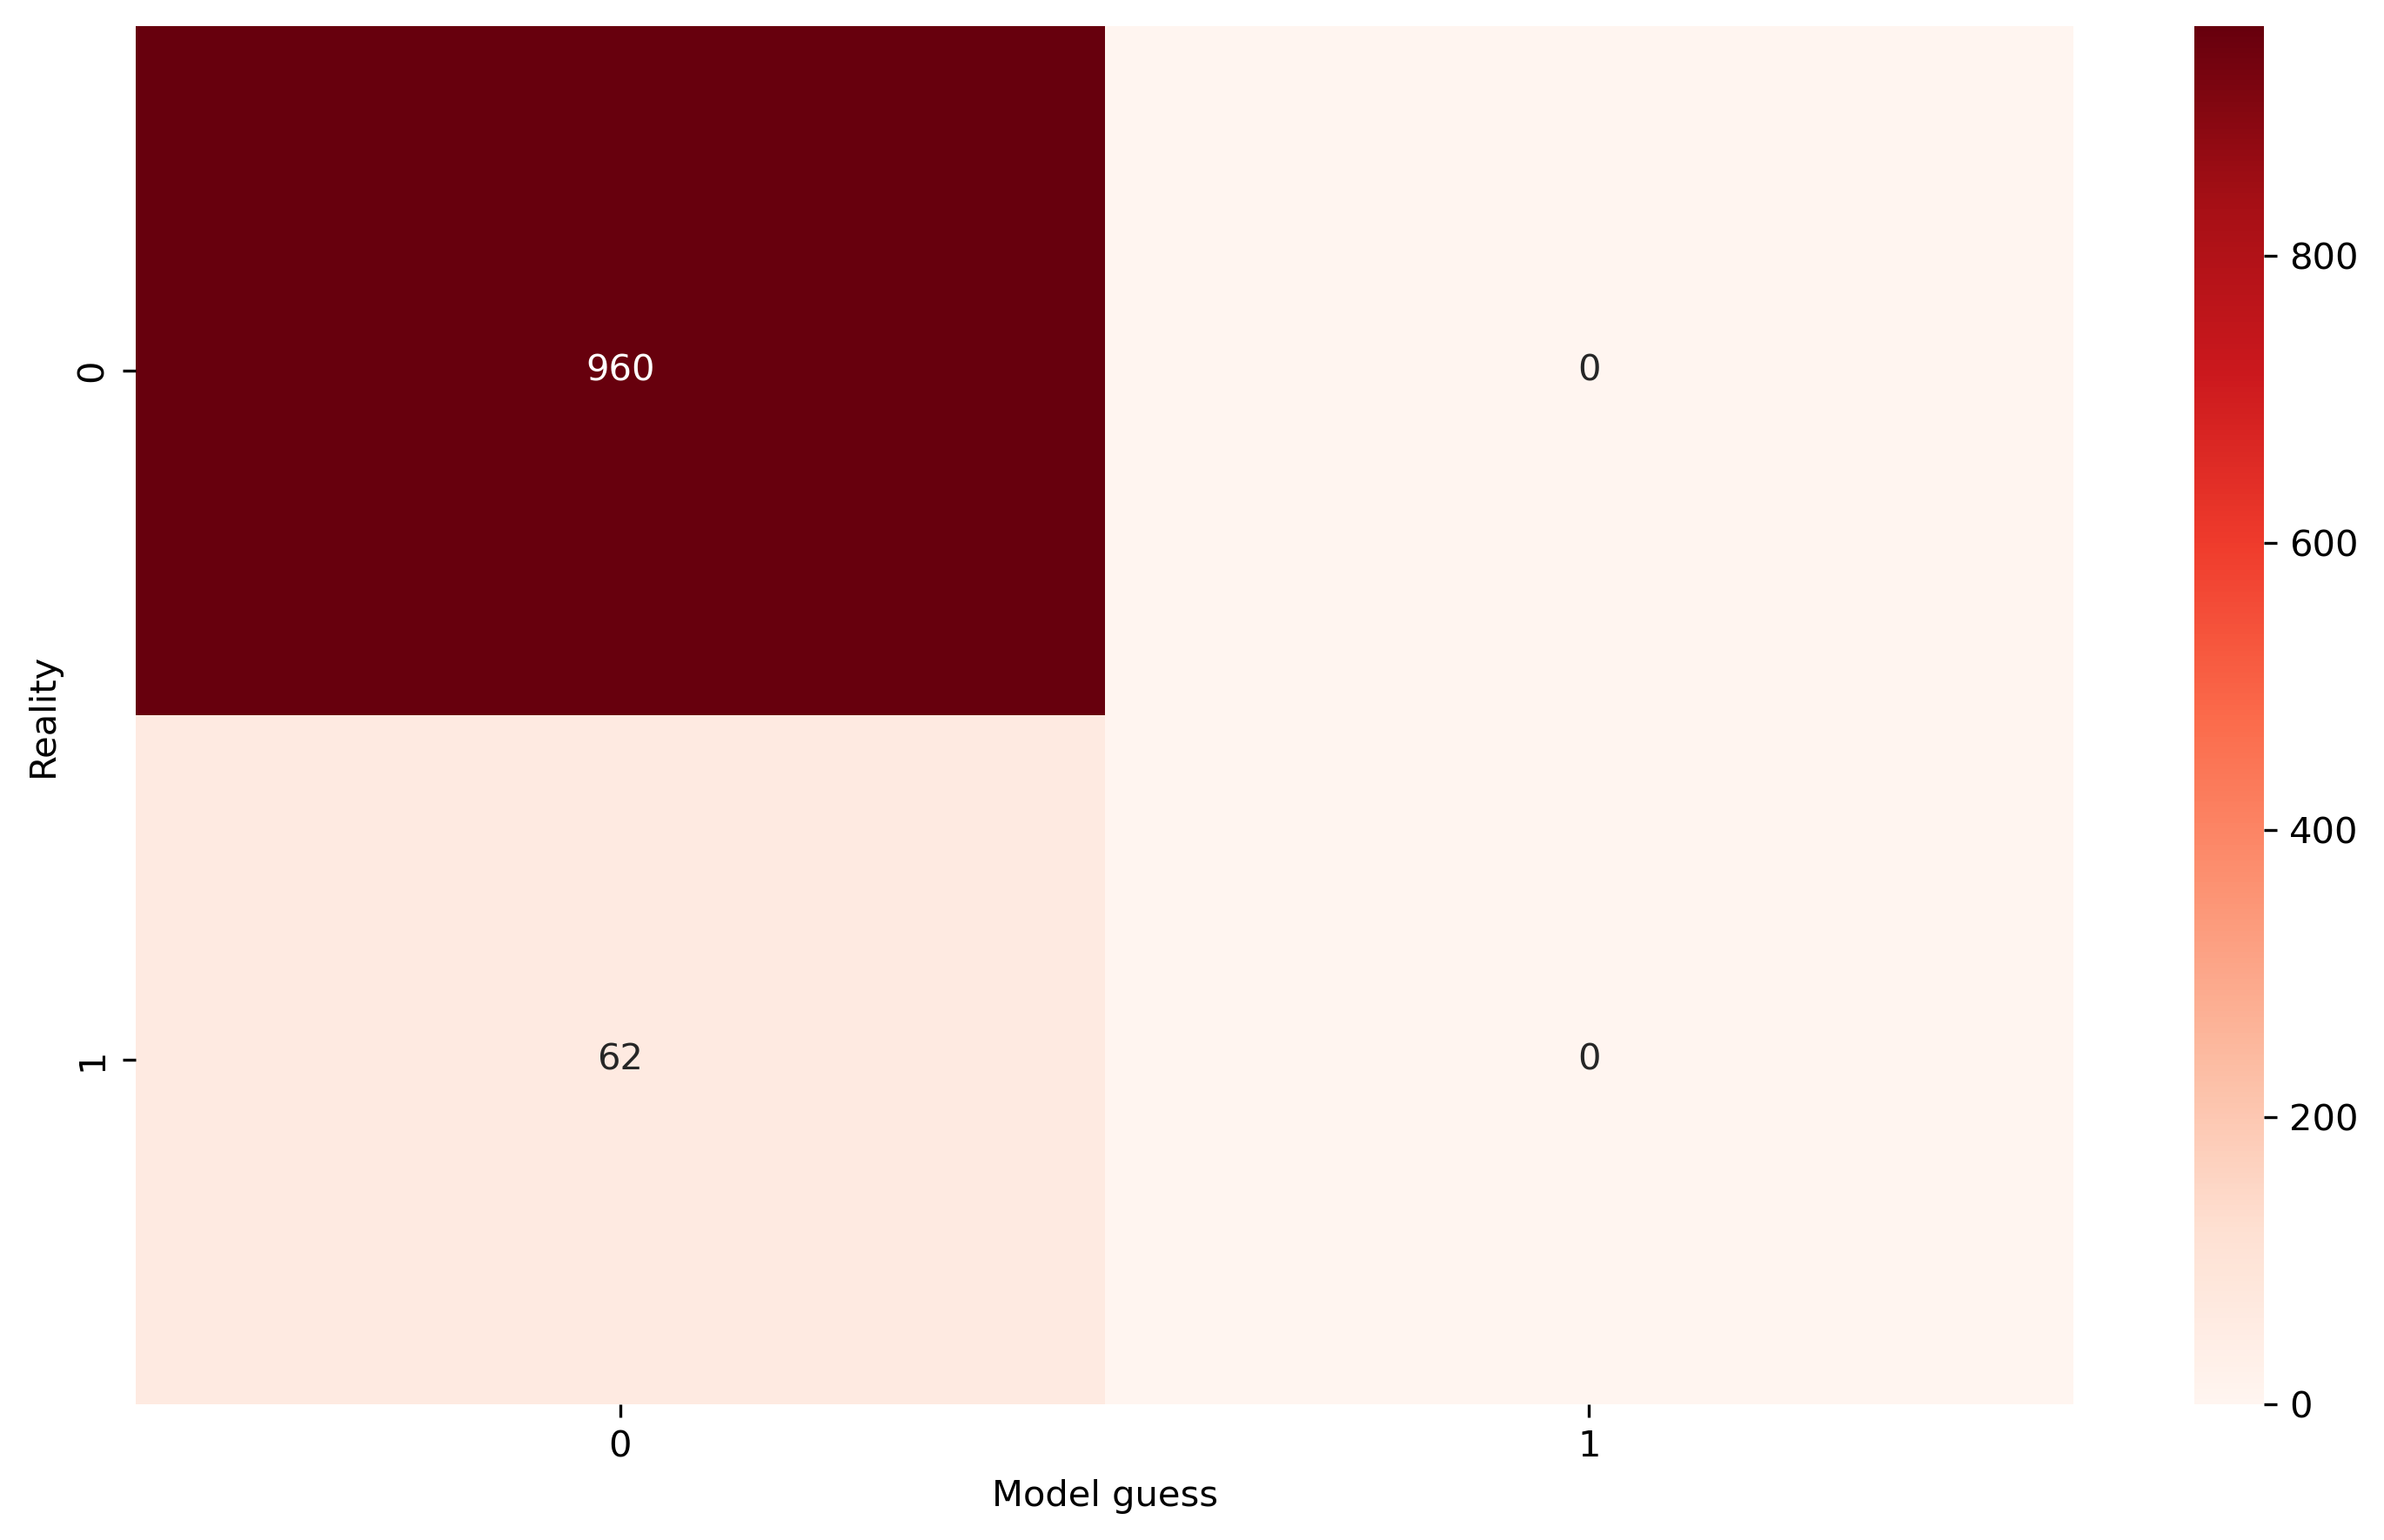

In [42]:
plt.figure(figsize=(10,6), dpi=300, facecolor='white')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(data=cm, annot=True, fmt="d", cmap="Reds")
ax.set_xlabel("Model guess")
ax.set_ylabel("Reality")
plt.tight_layout()
plt.show()


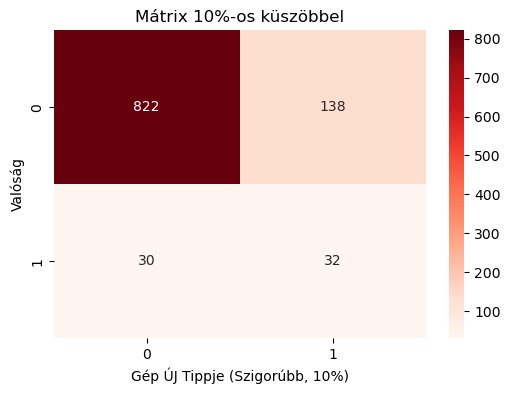

In [43]:
import matplotlib.pyplot as plt
from importlib import reload
reload(plt) 
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_prob = model.predict_proba(X_test)[:, 1] 

custom_threshold = 0.10
y_pred_new = (y_prob >= custom_threshold).astype(int)

plt.figure(figsize=(6, 4), dpi=100)
cm_new = confusion_matrix(y_test, y_pred_new)

sns.heatmap(cm_new, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Gép ÚJ Tippje (Szigorúbb, 10%)")
plt.ylabel("Valóság")
plt.title(f"Mátrix {int(custom_threshold*100)}%-os küszöbbel")
plt.show()

In [44]:
df_clean

gender   age hypertension heart_disease ever_married      work_type  \
id                                                                           
9046     Male  67.0           No           Yes          Yes        Private   
51676  Female  61.0           No            No          Yes  Self-employed   
31112    Male  80.0           No           Yes          Yes        Private   
60182  Female  49.0           No            No          Yes        Private   
1665   Female  79.0          Yes            No          Yes  Self-employed   
...       ...   ...          ...           ...          ...            ...   
18234  Female  80.0          Yes            No          Yes        Private   
44873  Female  81.0           No            No          Yes  Self-employed   
19723  Female  35.0           No            No          Yes  Self-employed   
37544    Male  51.0           No            No          Yes        Private   
44679  Female  44.0           No            No          Yes       Govt_job   

      Residence_type  avg_glucose_level   bmi   smoking_status stroke  
id                                                                     
9046           Urban             228.69  36.6  formerly smoked    Yes  
51676          Rural             202.21  28.1     never smoked    Yes  
31112          Rural             105.92  32.5     never smoked    Yes  
60182          Urban             171.23  34.4           smokes    Yes  
1665           Rural             174.12  24.0     never smoked    Yes  
...              ...                ...   ...              ...    ...  
18234          Urban              83.75  28.1     never smoked     No  
44873          Urban             125.20  40.0     never smoked     No  
19723          Rural              82.99  30.6     never smoked     No  
37544          Rural             166.29  25.6  formerly smoked     No  
44679          Urban              85.28  26.2          Unknown     No  

[5109 rows x 11 columns]

C:\Users\Molnár Szabolcs\AppData\Local\Temp\ipykernel_39292\2920285956.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


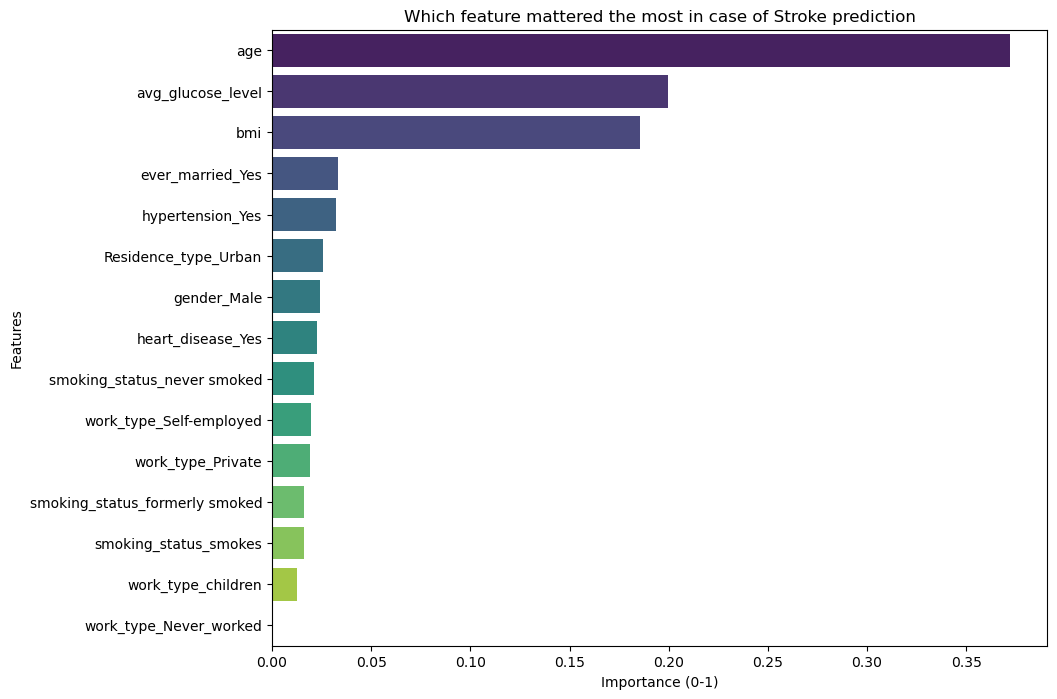

             Feature  Importance
0                age    0.372119
1  avg_glucose_level    0.199471
2                bmi    0.185486
6   ever_married_Yes    0.033152
4   hypertension_Yes    0.032423


In [45]:
importances = model.feature_importances_
feature_names = X_train.columns

feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Which feature mattered the most in case of Stroke prediction')
plt.xlabel('Importance (0-1)')
plt.ylabel('Features')
plt.show()

print(feature_df.head(5))

<Axes: >

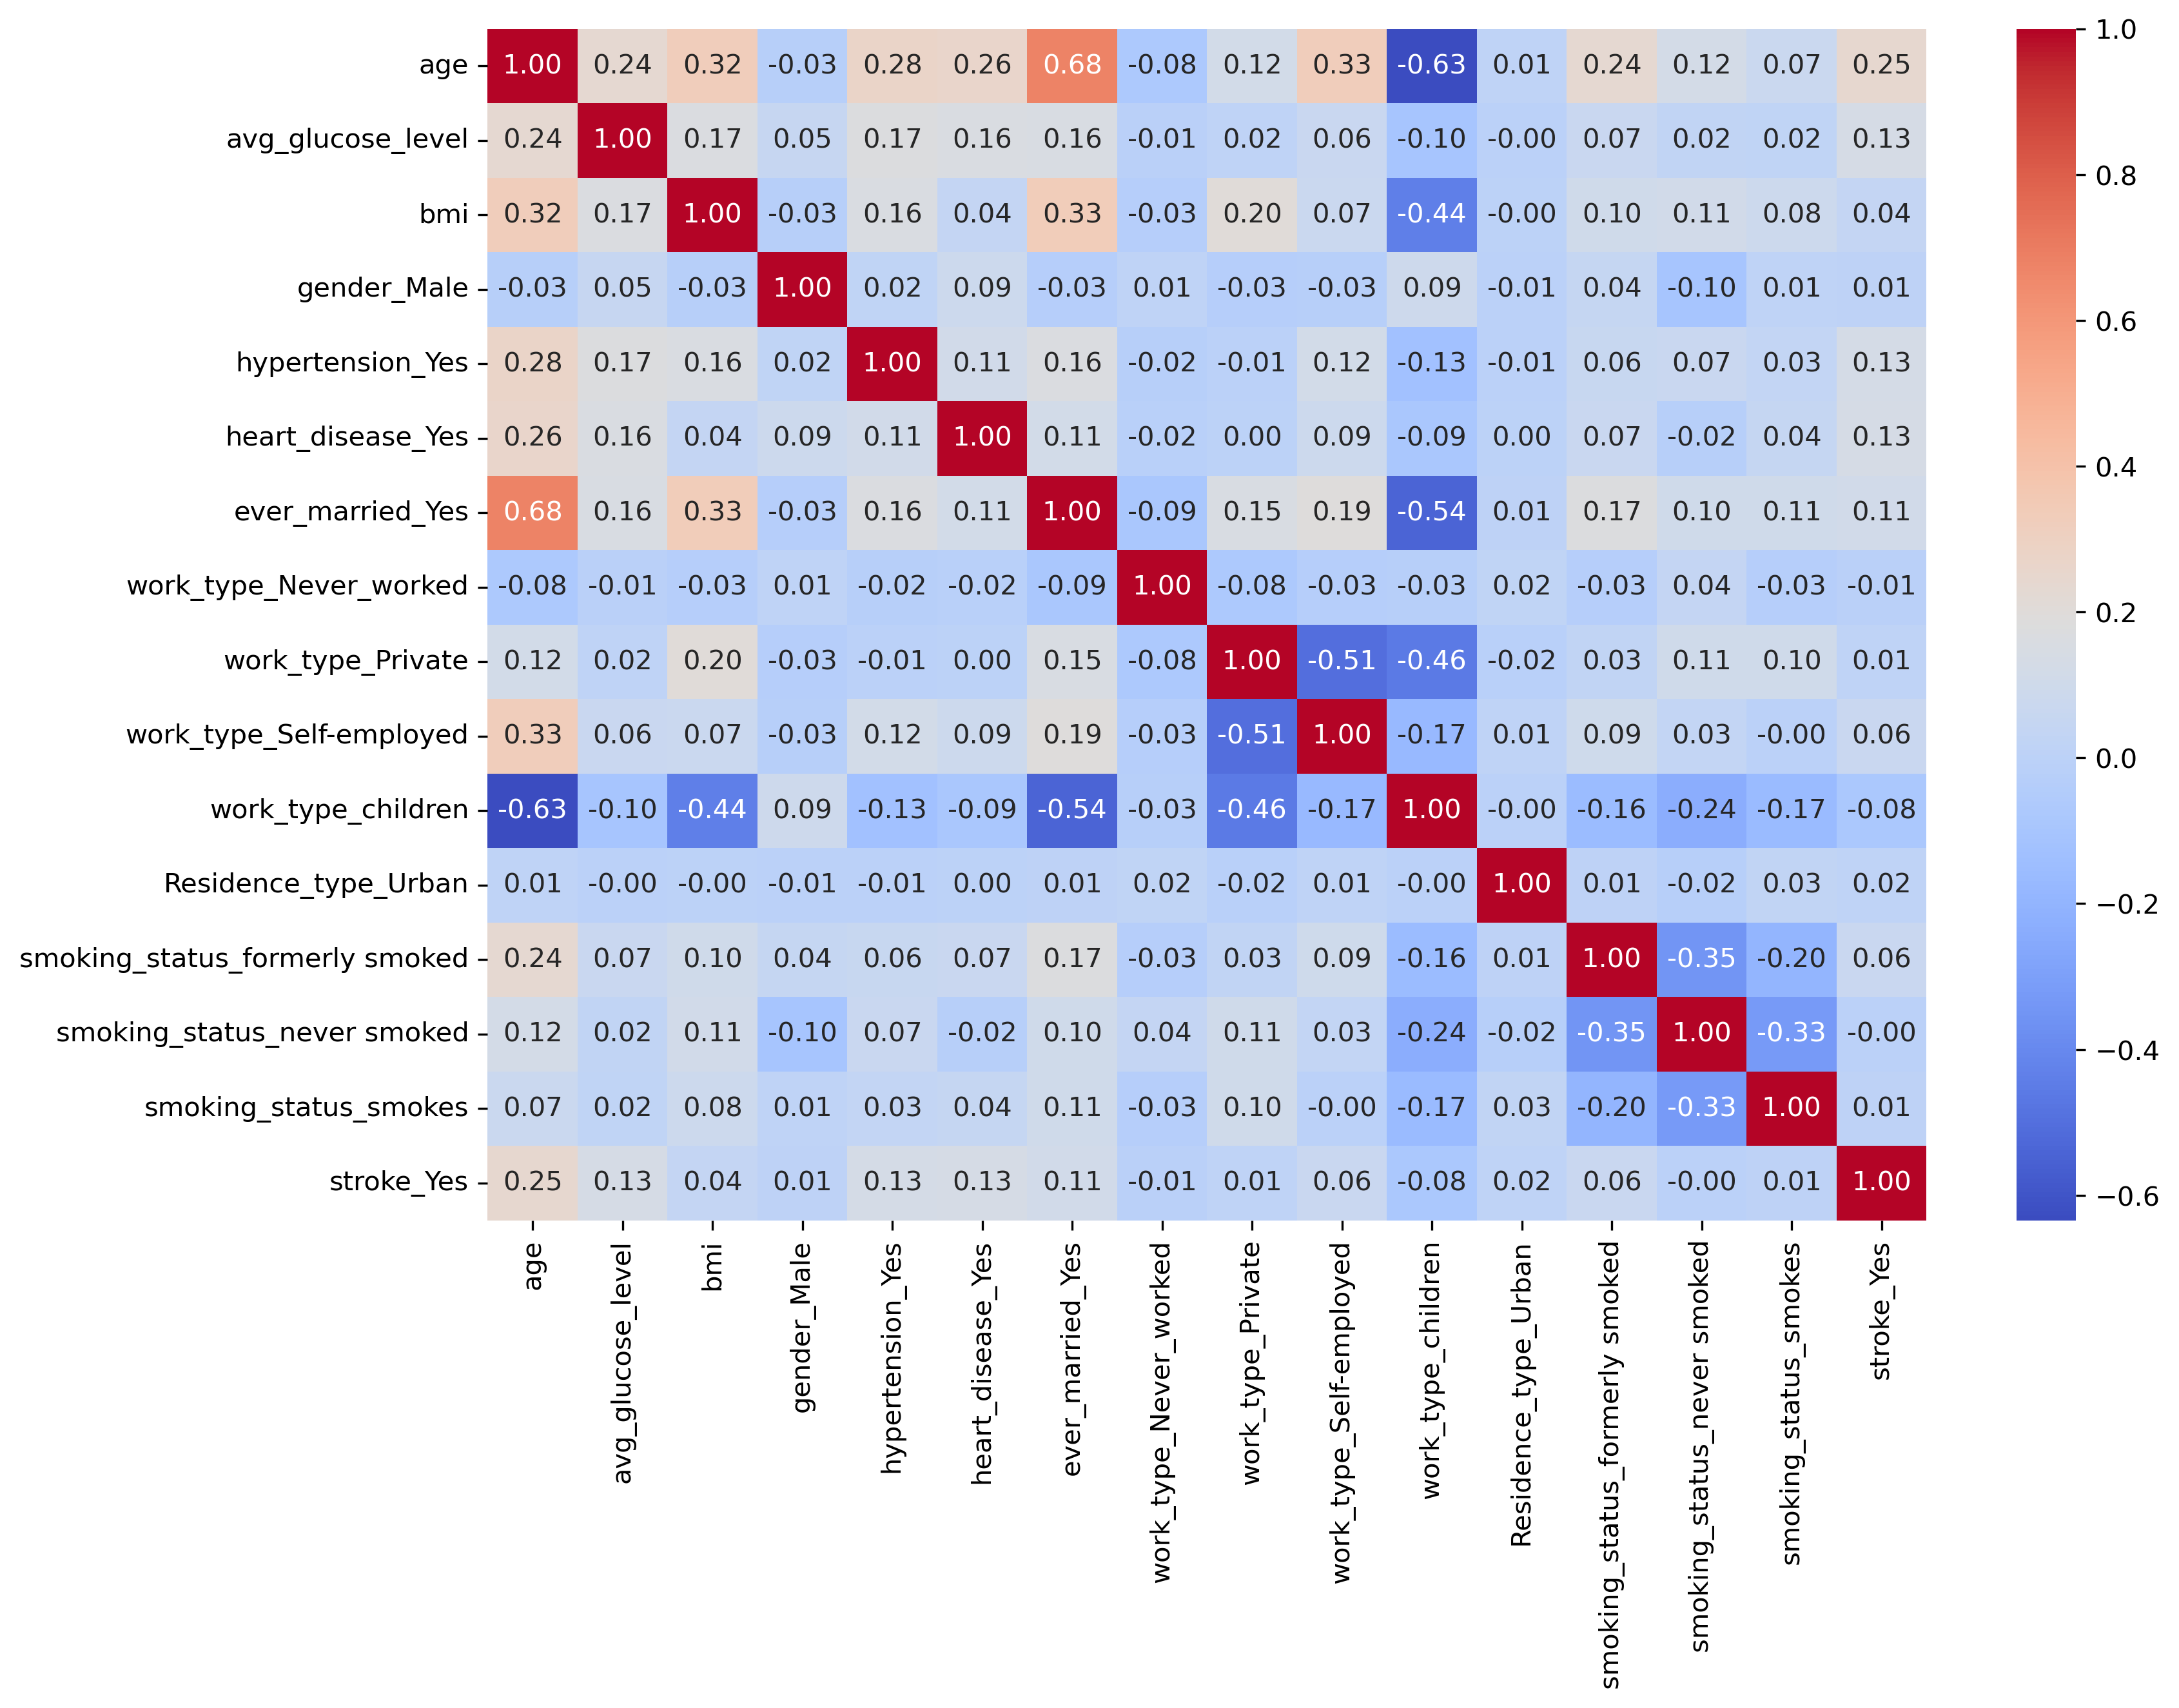

In [46]:
corr_matrix= df_clean_ml.corr(method="pearson")
plt.figure(figsize=(12,8), dpi=300)
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", )

C:\Users\Molnár Szabolcs\AppData\Local\Temp\ipykernel_39292\279446336.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  glk_stroke = sns.boxplot(data=df_clean, x="stroke", y="avg_glucose_level", palette="Set2")


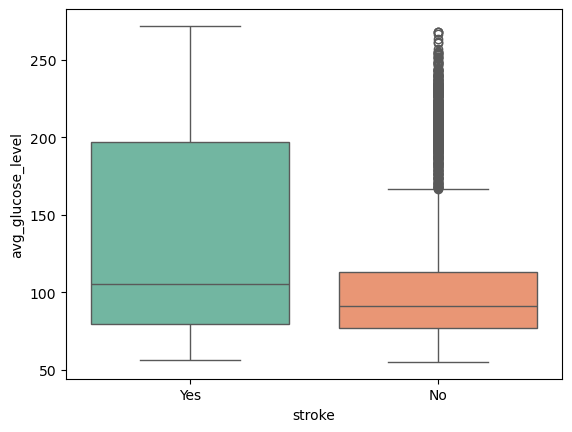

In [47]:
glk_stroke = sns.boxplot(data=df_clean, x="stroke", y="avg_glucose_level", palette="Set2")
groups= df_clean.groupby("stroke")['avg_glucose_level']
means= groups.mean()
medians= groups.median()
q1= groups.quantile(0.25)
q3= groups.quantile(0.75)



C:\Users\Molnár Szabolcs\AppData\Local\Temp\ipykernel_39292\734258204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_clean, x="stroke", y="avg_glucose_level", palette="Set2")


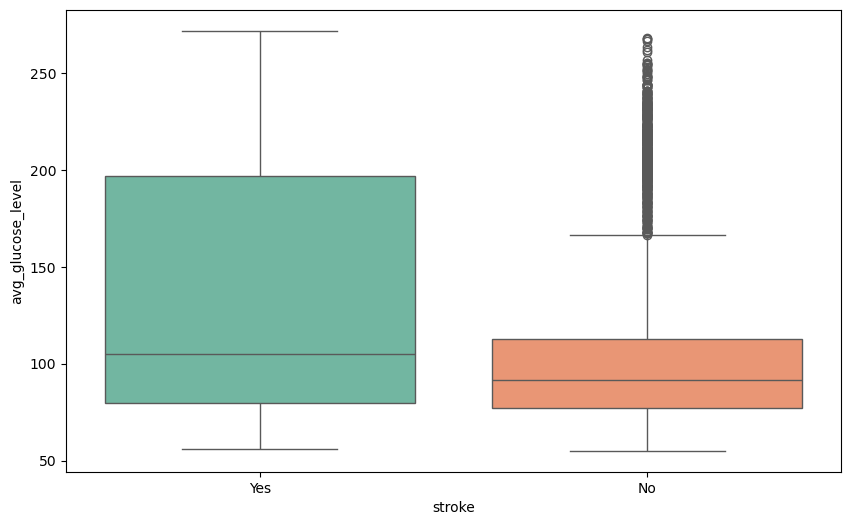

         count        mean        std    min    25%      50%     75%     max
stroke                                                                      
No      4860.0  104.787584  43.847095  55.12  77.12   91.465  112.80  267.76
Yes      249.0  132.544739  61.921056  56.11  79.79  105.220  196.71  271.74


In [48]:
plt.figure(figsize=(10, 6))

ax = sns.boxplot(data=df_clean, x="stroke", y="avg_glucose_level", palette="Set2")

plt.show()
stat_table = df_clean.groupby("stroke")["avg_glucose_level"].describe()
print(stat_table)

In [49]:
import plotly.express as px

fig = px.box(df_clean, x="stroke", y="avg_glucose_level", title="Interactive Boxplot")
fig.show()

In [50]:
stroke_glucose = df_clean["avg_glucose_level"][df_clean["stroke"]=="Yes"]
healthy_glucose = df_clean["avg_glucose_level"][df_clean["stroke"] == "No"]

difference_stat, difference_p = f_oneway(stroke_glucose, healthy_glucose)
print(difference_stat, difference_p)

90.55002552773442 2.7053026971743527e-21


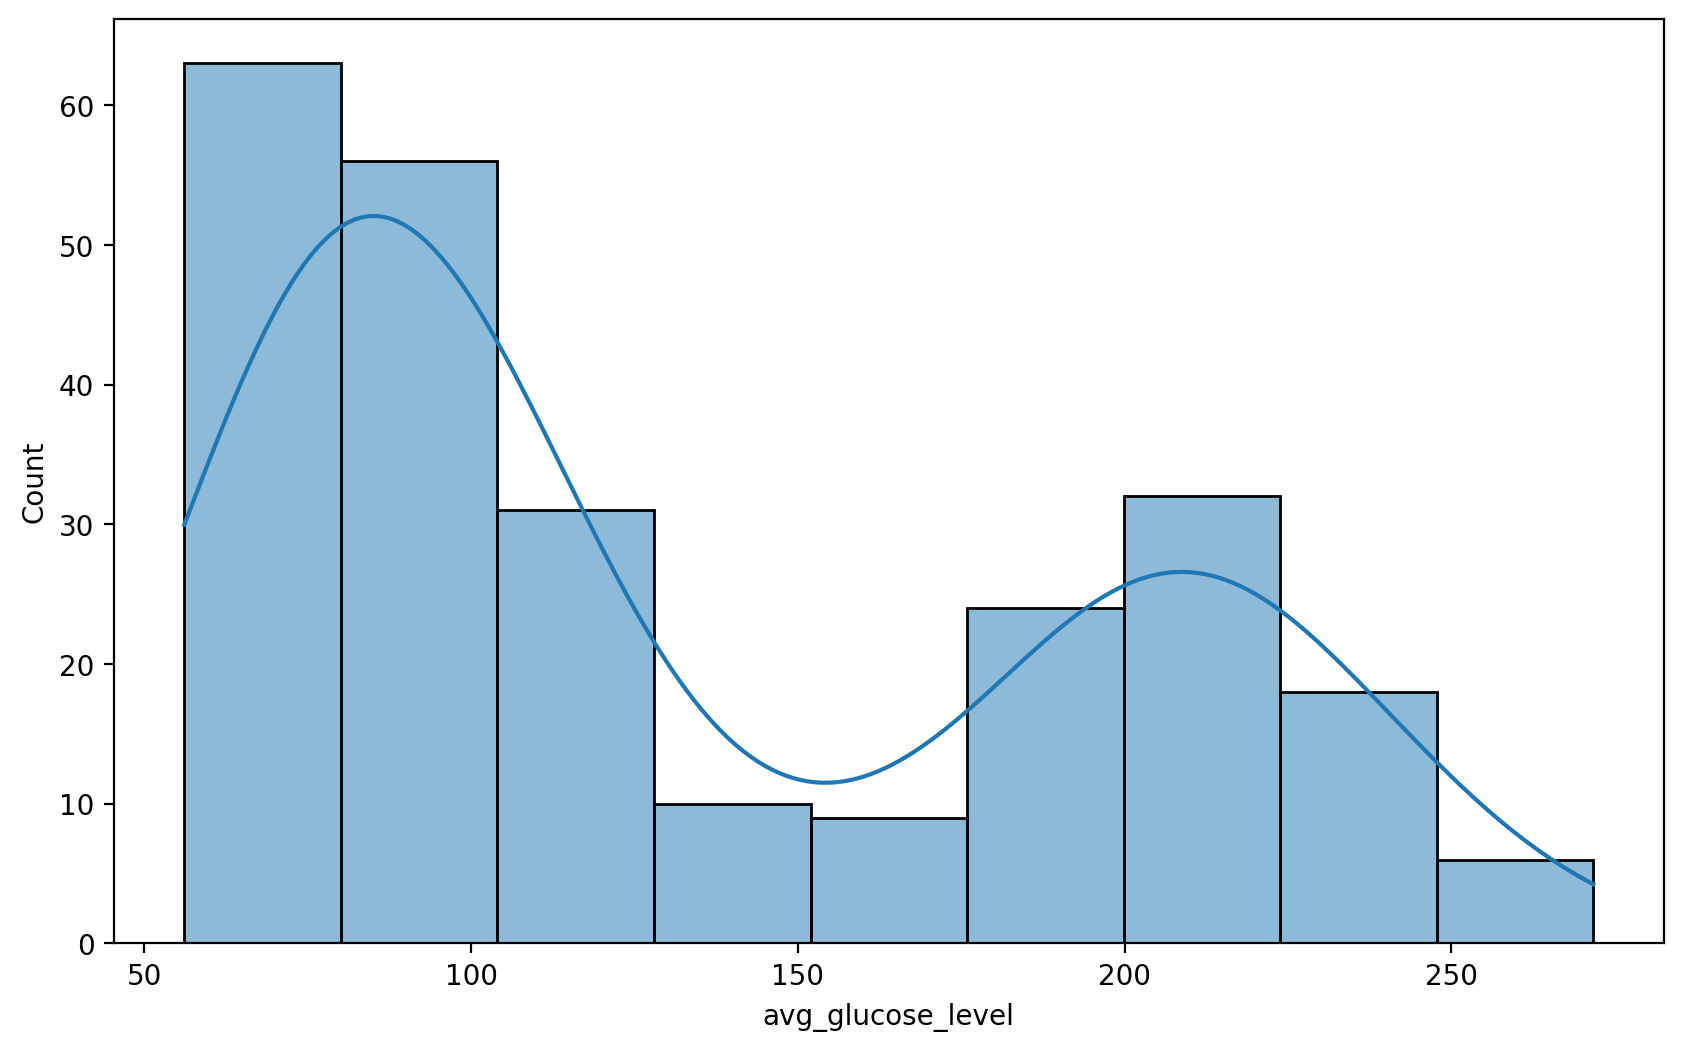

In [51]:
plt.figure(figsize=(10,6), dpi=200)
stroke_normcheck=sns.histplot(data=stroke_glucose, kde=True)
plt.show()


In [52]:
stat, p = mannwhitneyu(x=stroke_glucose, y=healthy_glucose)
print(stat, p)

print("since p < 0,00000000.. this means the chance of the difference between the 2 groups being random are converging to 0.\n The Connection between High glucose level and stroke is rock solid")
# mivel kisebb a p ertek (0,000000003583) mint 0,05, ezert az esely hogy a ket csoport kozti kulonbseg 
# csak a veletlen muve NULLA. Sziklaszilard a kapcsolat a magas vercukorszint es a stroke kozott. 


739058.0 3.583094987269707e-09
since p < 0,00000000.. this means the chance of the difference between the 2 groups being random are converging to 0.
 The Connection between High glucose level and stroke is rock solid


In [53]:
stroke_group = df_clean_ml[df_clean_ml['stroke_Yes'] == 1]
Healthy_group = df_clean_ml[df_clean_ml['stroke_Yes'] == 0]

Count_of_strokegroup = len(stroke_group)
print(f"Count of people with stroke: {Count_of_strokegroup}")

#undersampling
healthy_sample = Healthy_group.sample(n=Count_of_strokegroup, random_state=42)


df_balanced = pd.concat([stroke_group, healthy_sample], axis=0)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nDistribution of the new table:")
print(df_balanced['stroke_Yes'].value_counts())

Count of people with stroke: 249

Distribution of the new table:
stroke_Yes
0    249
1    249
Name: count, dtype: int64


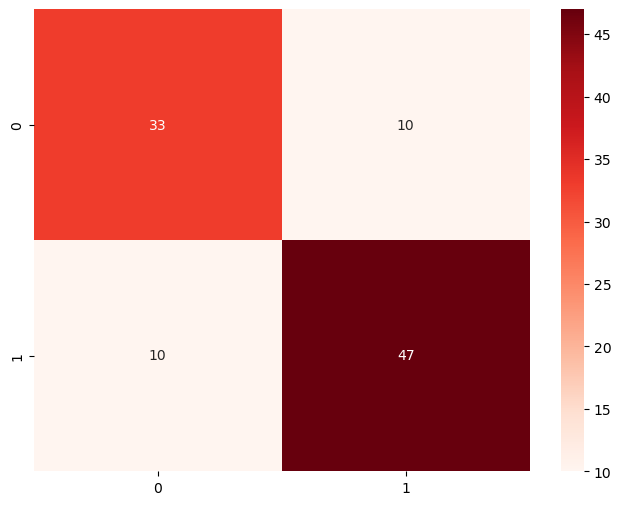

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_drop = ['stroke_Yes']
if 'stroke_No' in df_balanced.columns:
    cols_to_drop.append('stroke_No')

X = df_balanced.drop(cols_to_drop, axis=1)
y = df_balanced['stroke_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6), dpi=100)
cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(data=cm, annot=True, fmt="d", cmap="Reds")

plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],      # Try it with 50, 100, and 200 trees
    'max_depth': [None, 10, 20, 30],     # Try with different depths
    'min_samples_leaf': [1, 2, 4]        # How many sample per leaf
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# cv=3: Cross-Validation (Testing each setting 3 times to make sure)
# n_jobs=-1: Using every cores of the cpu

grid_search.fit(X_train, y_train)

print(f"The best setting: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
The best setting: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}


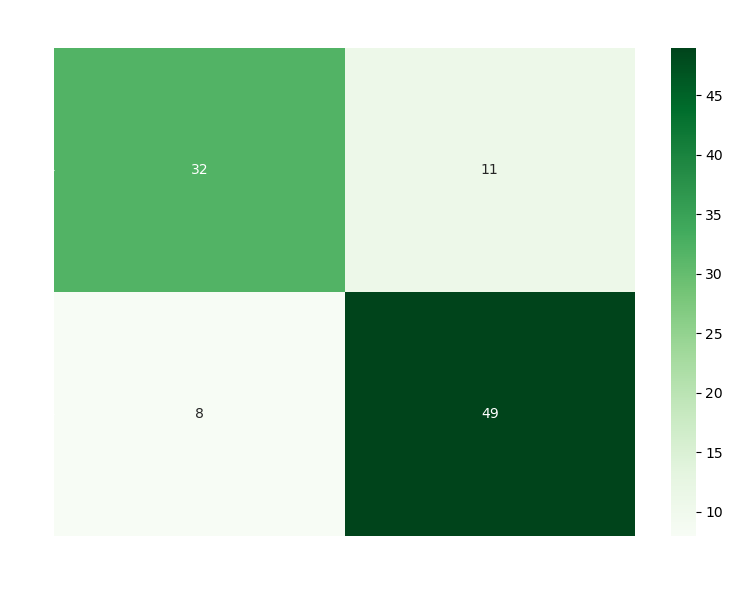

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        43
           1       0.82      0.86      0.84        57

    accuracy                           0.81       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.81      0.81       100



In [56]:
#Trying prediction with the best model
y_pred_opt = best_model.predict(X_test)

plt.figure(figsize=(8, 6), dpi=100)
cm = confusion_matrix(y_test, y_pred_opt)

ax = sns.heatmap(data=cm, annot=True, fmt="d", cmap="Greens") 

ax.set_xlabel("Guess of the best model", fontsize=12, color="white")
ax.set_ylabel("Reality", fontsize=12, color="white")
ax.set_title(f"Result of the best model\n(Depth=10, Trees=200)", color="white")
ax.tick_params(colors='white')

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_opt))

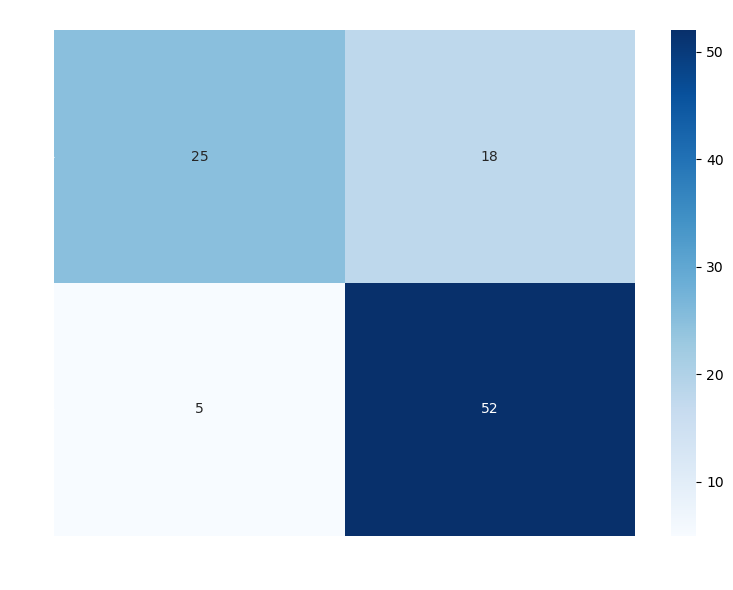


--- More detailed report (Threshold: 0.3) ---
              precision    recall  f1-score   support

           0       0.83      0.58      0.68        43
           1       0.74      0.91      0.82        57

    accuracy                           0.77       100
   macro avg       0.79      0.75      0.75       100
weighted avg       0.78      0.77      0.76       100



In [57]:

y_prob = best_model.predict_proba(X_test)[:, 1]

# Making a stricter treshold; since the aim here is not the "most precise" modell all in all, but to predict most of the people with stroke with relatively being balanced to the number of false positive detection
#instead of 0.5, the new treshold is 0.3
threshold = 0.3
y_pred_new_threshold = (y_prob >= threshold).astype(int)

plt.figure(figsize=(8, 6), dpi=100)
cm = confusion_matrix(y_test, y_pred_new_threshold)

ax = sns.heatmap(data=cm, annot=True, fmt="d", cmap="Blues")

ax.set_xlabel(f"Model guess (Threshold = {threshold})", fontsize=12, color="white")
ax.set_ylabel("Reality", fontsize=12, color="white")
ax.set_title(f"Result in case of 30% suspition of stroke: ", color="white")
ax.tick_params(colors='white')

plt.tight_layout()
plt.show()

# +1: Szöveges riport
print(f"\n--- More detailed report (Threshold: {threshold}) ---")
print(classification_report(y_test, y_pred_new_threshold))

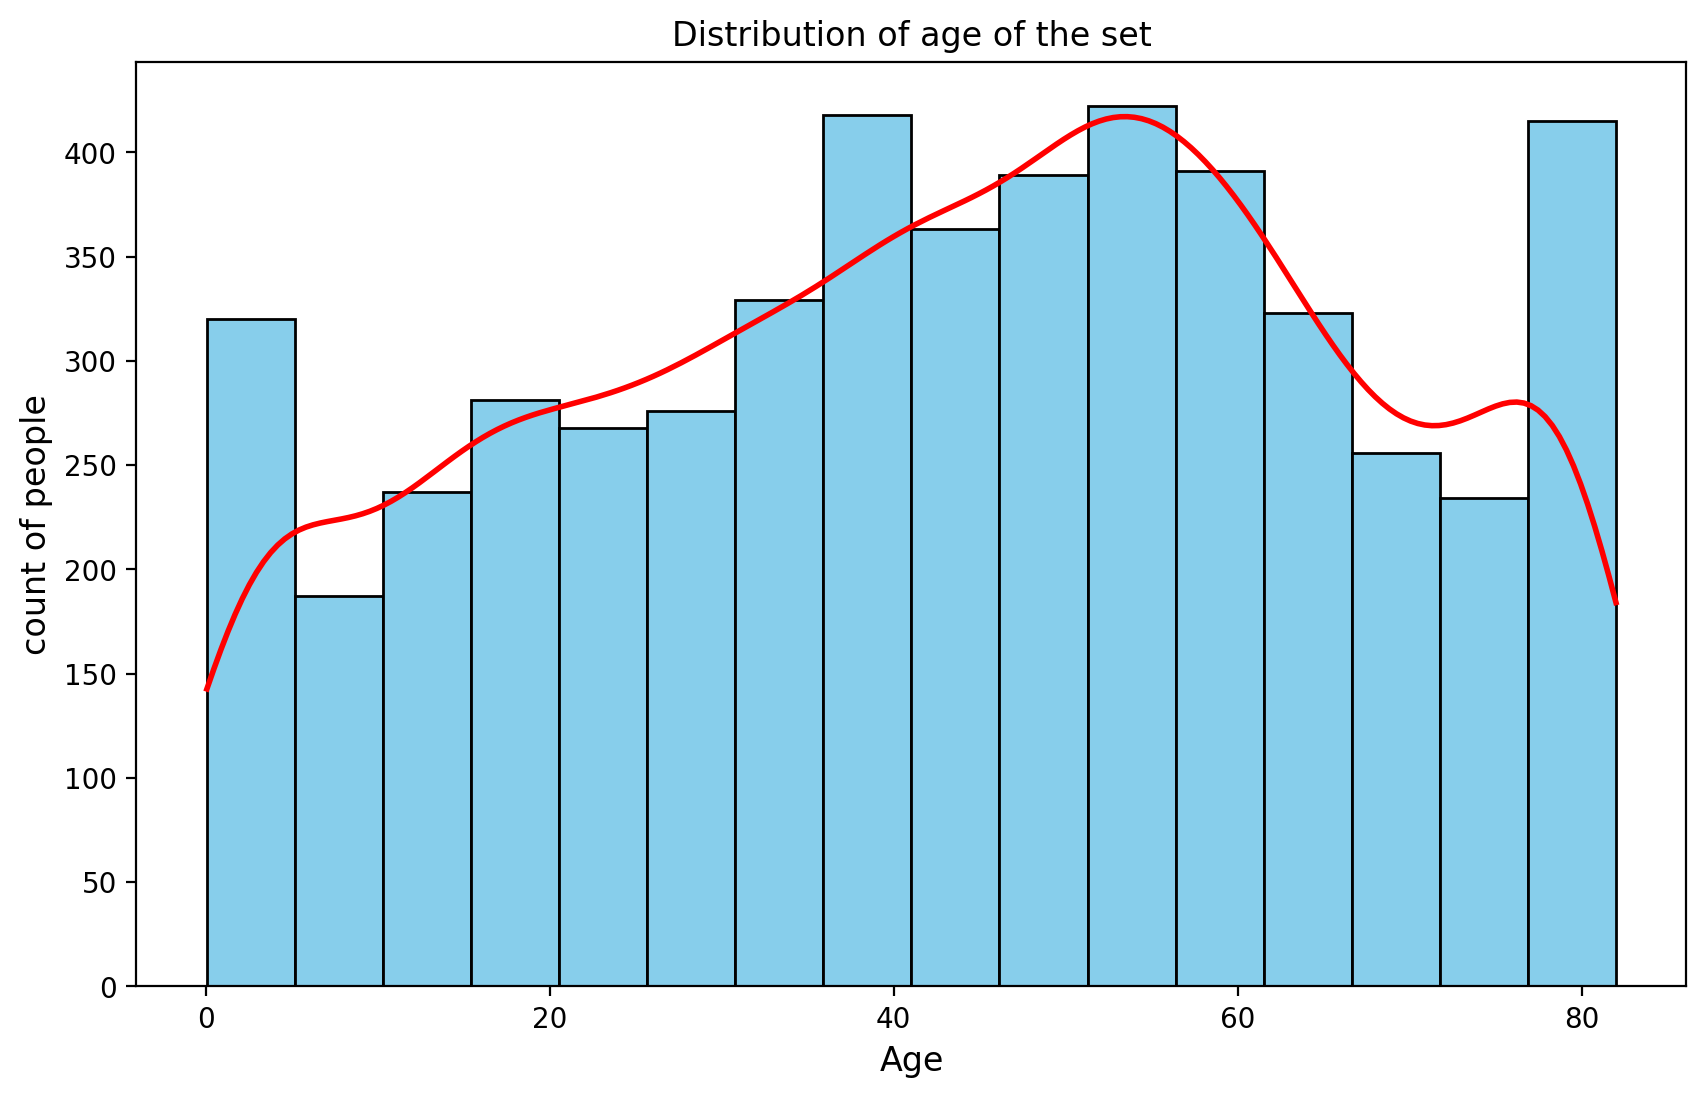

In [58]:


plt.figure(figsize=(10,6), dpi = 200)

diagram = sns.histplot(data=df_clean, x="age", kde=True, line_kws={'color':'red', "linewidth": 2}, edgecolor = "black", facecolor = "skyblue", color="red", bins=16)

plt.title(label="Distribution of age of the set")
plt.xlabel("Age", fontsize=12, loc = "center")
plt.ylabel("count of people", fontsize=12, )

plt.show()

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

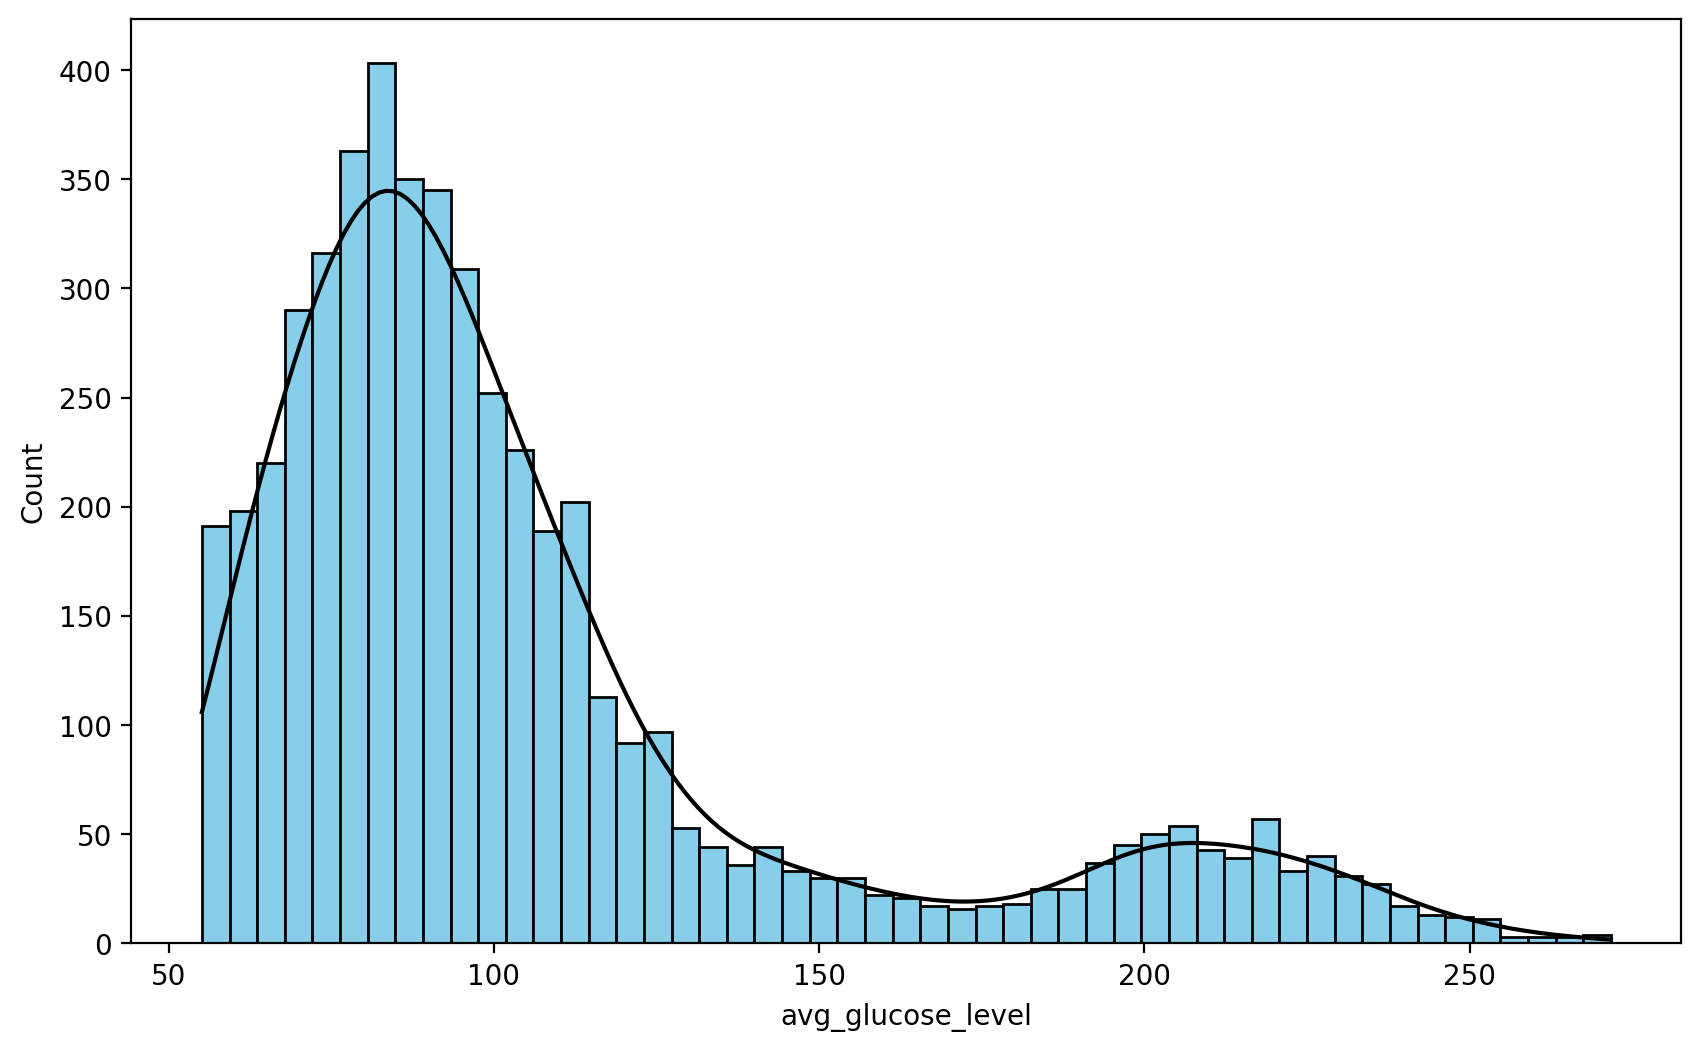

In [59]:
plt.figure(figsize = (10,6), dpi=200)
df_clean_log =  df_clean.copy()
df_clean_log["avg_glucose_level"] = np.log(df_clean_log["avg_glucose_level"])

sns.histplot(data=df_clean, x="avg_glucose_level", kde=True, edgecolor="black", facecolor='skyblue', color='black')

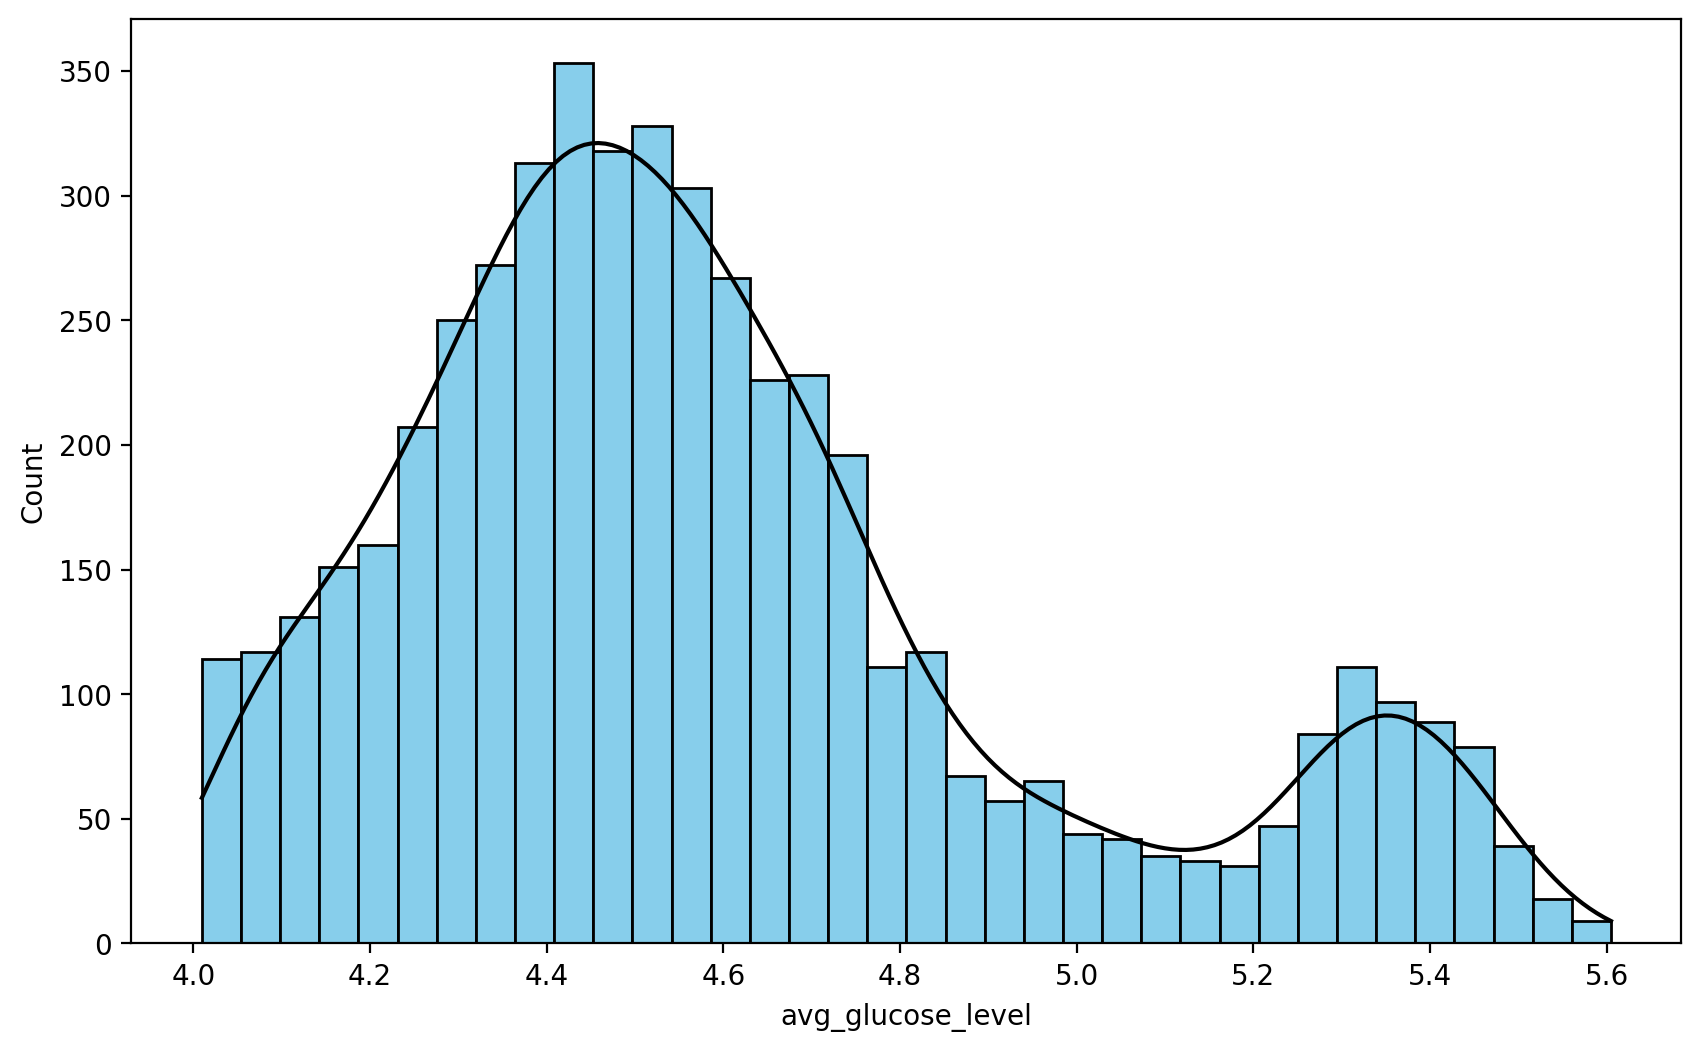

In [60]:
plt.figure(figsize = (10,6), dpi=200)
df_clean_log =  df_clean.copy()
df_clean_log["avg_glucose_level"] = np.log(df_clean_log["avg_glucose_level"])

avg_glucose_logolt = sns.histplot(data=df_clean_log, x="avg_glucose_level", kde=True, color='black', facecolor='skyblue')

plt.show()

In [61]:
###################################################################
#Didnt work completely, because its a bimodial distribution, that has 2 peaks; like 2 different groups intertwined

Text(0, 0.5, 'Average glucose level')

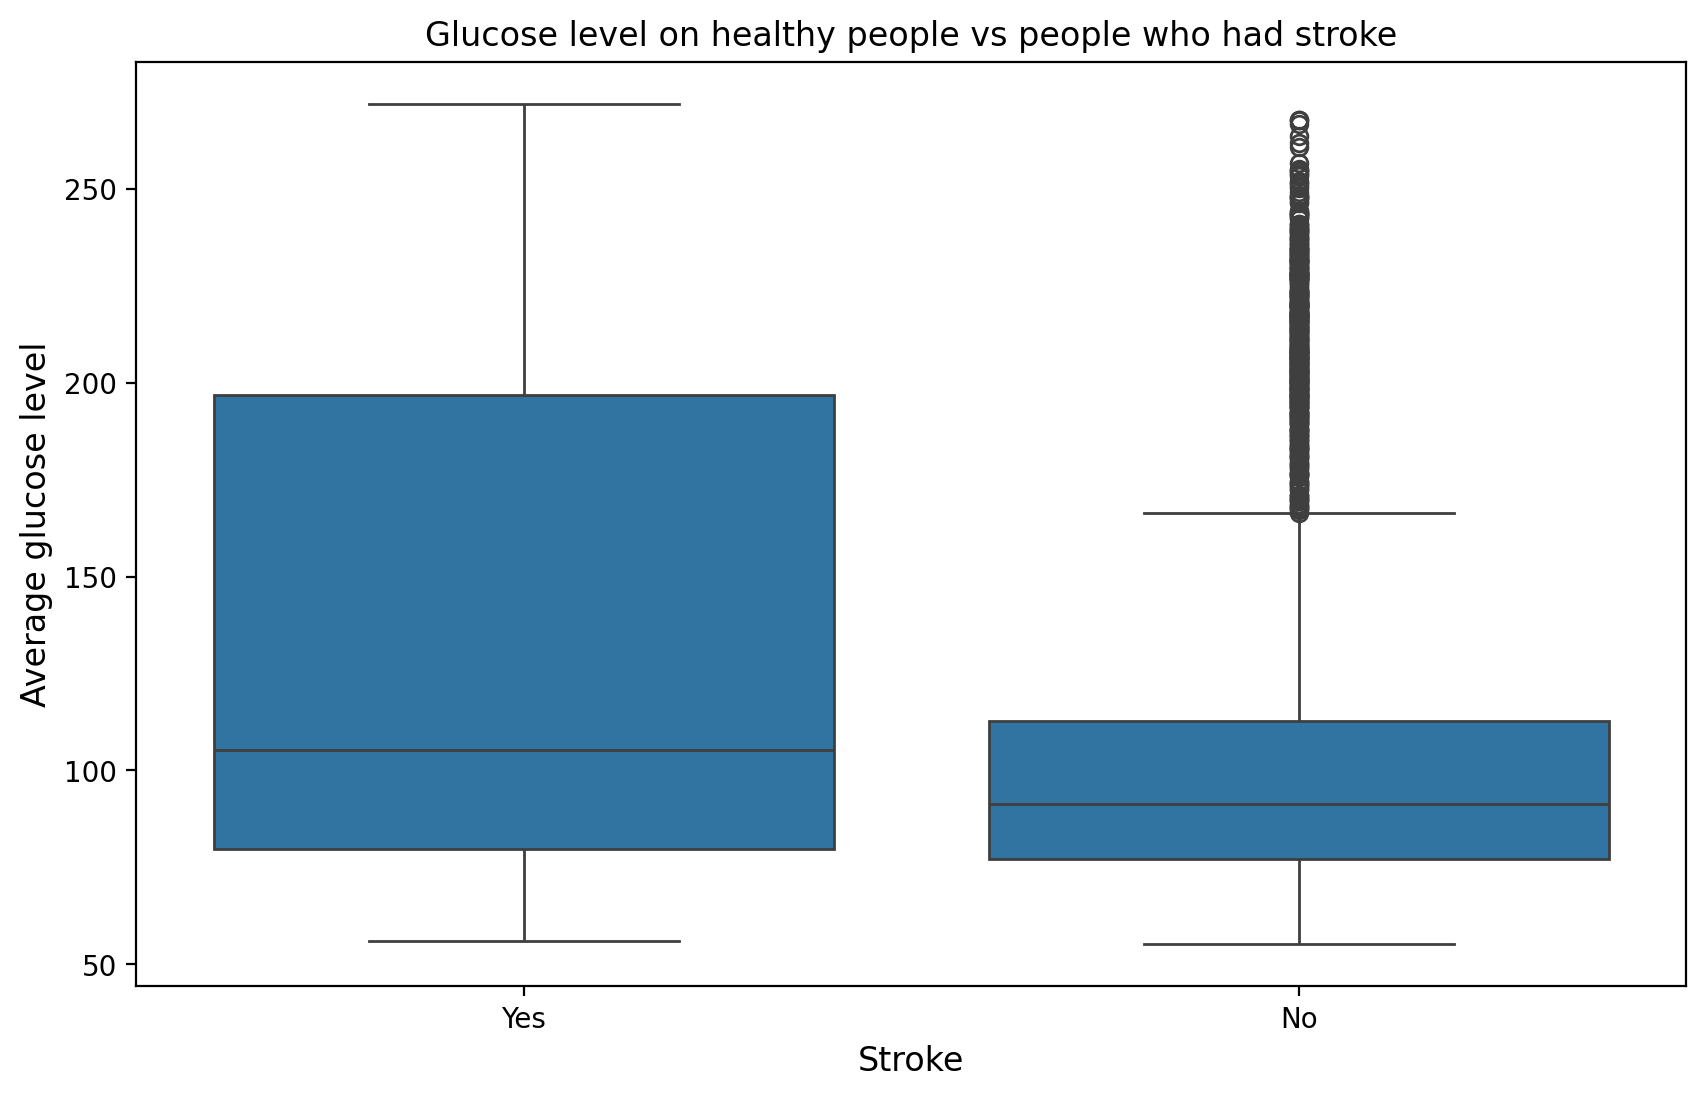

In [62]:
plt.figure(figsize=(10,6), dpi=200)

stroke_glukoz_bp=sns.boxplot(data=df_clean, x="stroke", y="avg_glucose_level")

plt.title("Glucose level on healthy people vs people who had stroke")
plt.xlabel("Stroke", fontsize=12)
plt.ylabel("Average glucose level", fontsize=12)

In [63]:
# ANALYSIS:

# Based on the plot, we can see that the variance is larger in the stroke group 
# compared to the non-stroke group. This is clear because the box itself (the Interquartile Range) 
# is much wider for stroke patients.

# The averages are also different: stroke patients generally have higher blood glucose levels. 
# The non-stroke group has lower values overall.

# However, we can see many outliers (dots) in the non-stroke group. 
# This does not mean the data is bad. It shows that while high glucose is strongly 
# connected to stroke, having high blood sugar does not guarantee that a patient 
# will definitely have a stroke.

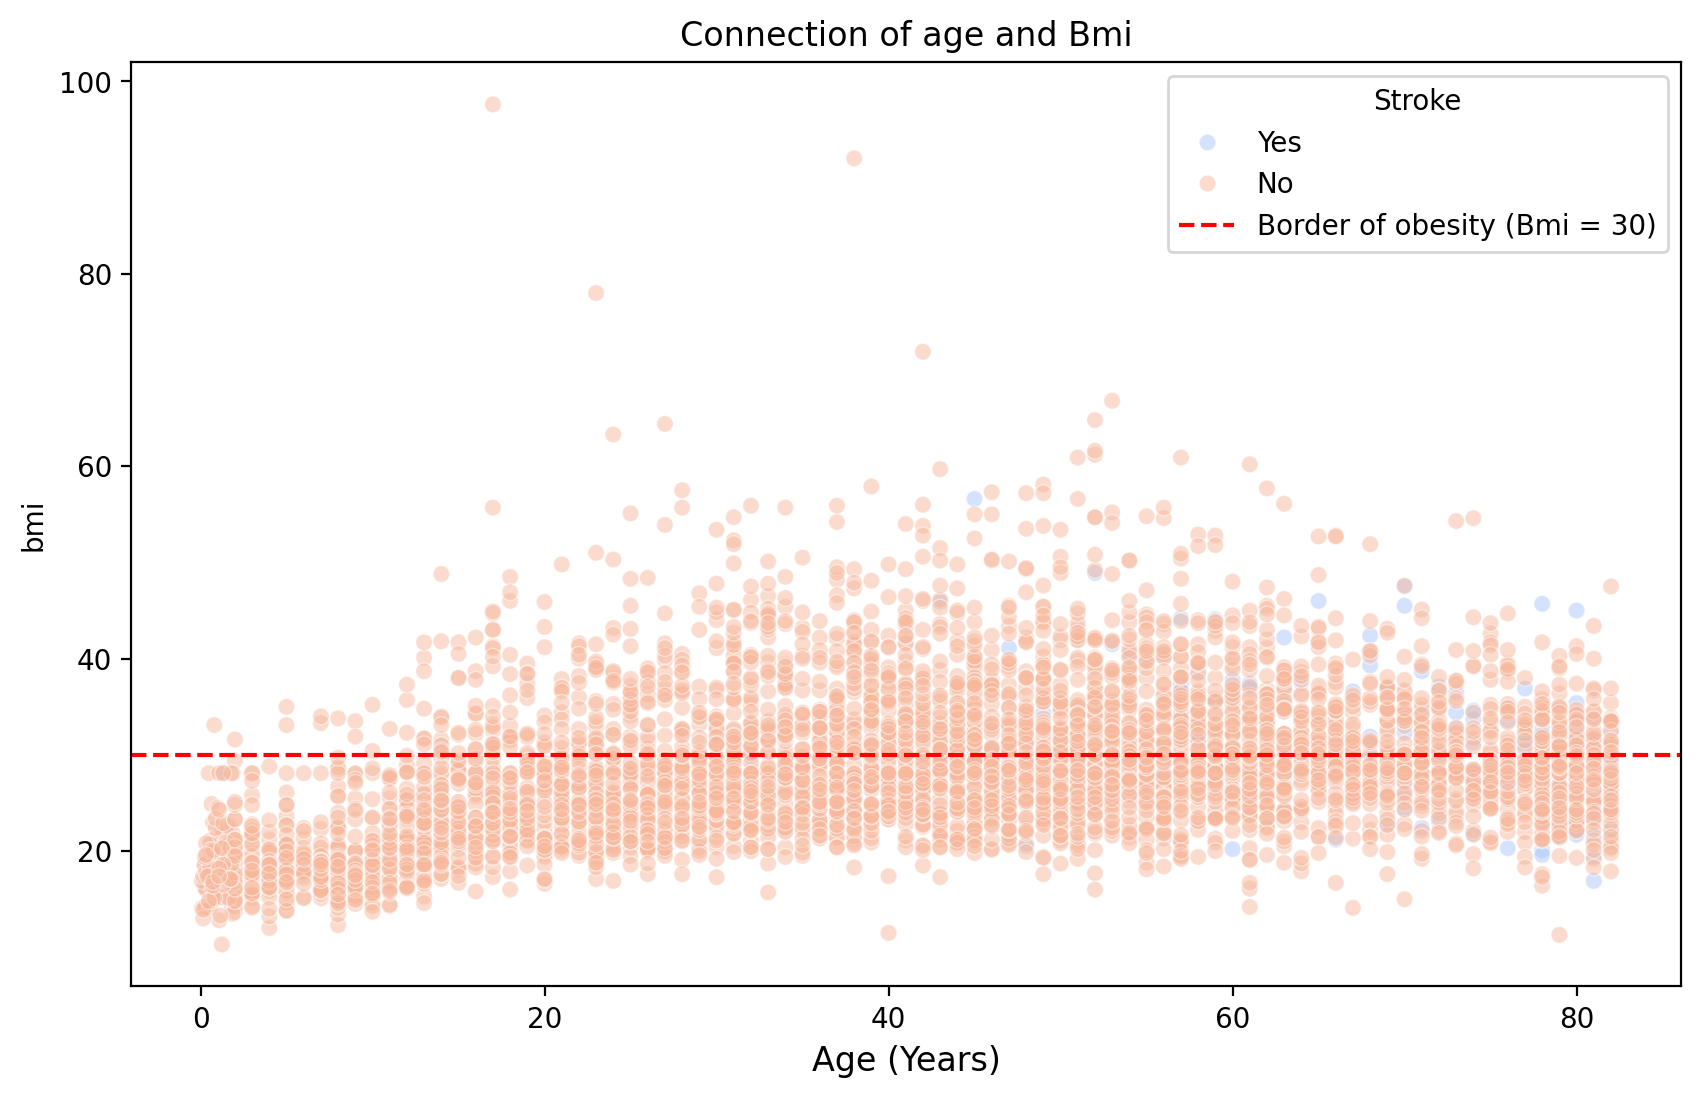

In [64]:
plt.figure(figsize=(10,6), dpi=200)

scat = sns.scatterplot(data=df_clean, x='age', y='bmi', hue='stroke', palette='coolwarm', alpha=0.5)

plt.title("Connection of age and Bmi", fontsize=12)
plt.axhline(y=30, color='red', linestyle='--', label='Border of obesity (Bmi = 30)')
plt.xlabel("Age (Years)", fontsize=12)
plt.legend(title="Stroke")

In [65]:
# CONCLUSION: There are so many non-stroke cases (95% vs 5%) that they overshadow the stroke cases on the plot.
# My solution: Undersampling; I will take an equal number of samples from the non-stroke group to match the stroke cases.

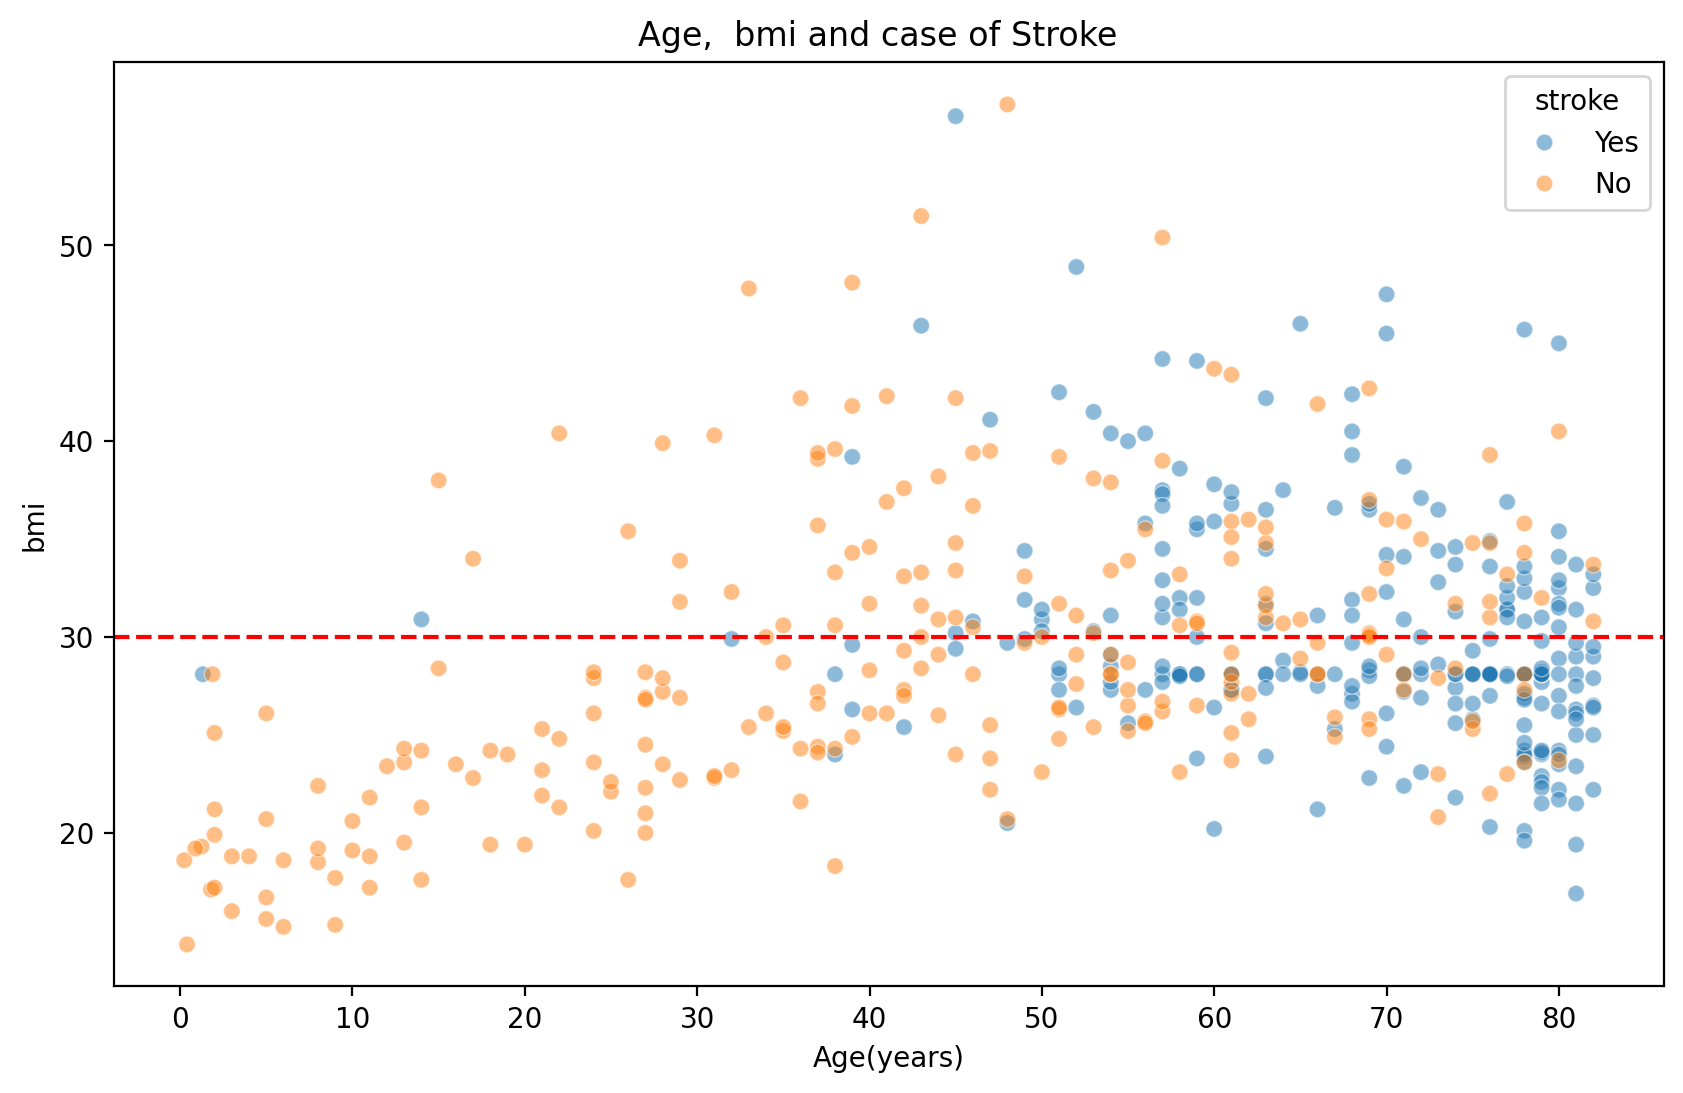

In [66]:
plt.figure(figsize=(10,6), dpi=200)

stroke_yes = df_clean[df_clean["stroke"] == "Yes"]
stroke_no=df_clean[df_clean["stroke"] == "No"]
stroke_yes_len = len(stroke_yes)
stroke_no_sample = stroke_no.sample(n=stroke_yes_len, random_state=42)

stroke_yes_no_egyenlo = pd.concat([stroke_yes, stroke_no_sample])

scatter_norm= sns.scatterplot(data=stroke_yes_no_egyenlo, x="age", y="bmi", hue="stroke", alpha=0.5 )

plt.title("Age,  bmi and case of Stroke  ")
plt.xlabel("Age(years)")
plt.ylabel("bmi")
plt.axhline(y=30, color='red', linestyle='--', label='Line of obesity (Bmi=30)')

In [67]:
# --- INSIGHTS ON BMI AND STROKE RELATIONSHIP ---
#
# 1. Pearson vs. Feature Importance:
# Initially, the Pearson correlation between BMI and Stroke appeared weak (0.04). 
# However, the Random Forest model ranked BMI as a top 3 important feature. 
# This contradiction exists because Pearson only detects linear relationships, whereas 
# the relationship between BMI and Stroke is non-linear (likely U-shaped). 
# Both high BMI (obesity) and very low BMI carry risks.
#
# 2. The Role of Age (Hypothesis):
# The scatterplot reveals that Age is a much stronger predictor than BMI. 
# Interestingly, the plot shows that patients over 70-80 years old tend to have lower BMI. 
# Since advanced age is the primary risk factor for stroke, the observed link between 
# low BMI and stroke is LIKELY DRIVEN BY AGE. 
# In other words: "Low BMI" often correlates with stroke in this dataset mainly because 
# the elderly population (who are at highest risk) tends to have lower body weight.

#SQL queries for data validation

In [68]:

import sqlite3
import pandas as pd

conn = sqlite3.connect(':memory:')

df_clean.to_sql('betegek', conn, index=False, if_exists='replace')

def sql(query):
    return pd.read_sql(query, conn)


In [69]:
sql("SELECT ever_married, AVG(avg_glucose_level) FROM betegek GROUP BY ever_married HAVING avg_glucose_level > 110")

ever_married  AVG(avg_glucose_level)
0          Yes               111.23031

In [70]:
query = """
SELECT
    work_type,
    gender,
    avg_glucose_level,
    RANK() OVER (PARTITION BY work_type ORDER BY avg_glucose_level DESC) as rangsor
FROM betegek
WHERE stroke = 'Yes' -- Csak a stroke-osokat nézzük most
LIMIT 100
"""
sql(query)

work_type  gender  avg_glucose_level  rangsor
0   Govt_job  Female             263.32        1
1   Govt_job    Male             219.73        2
2   Govt_job    Male             217.08        3
3   Govt_job    Male             216.94        4
4   Govt_job  Female             215.94        5
..       ...     ...                ...      ...
95   Private  Female             130.54       63
96   Private    Male             129.98       64
97   Private  Female             127.29       65
98   Private  Female             116.44       66
99   Private    Male             114.77       67

[100 rows x 4 columns]

In [71]:
query = """
    WITH munkahely_stat AS (
        SELECT 
            work_type,
            AVG(age) AS atlag_eletkor,
            COUNT(*) AS dolgozok_szama
        FROM betegek
        GROUP BY work_type
    )
    SELECT *
    FROM munkahely_stat
    WHERE atlag_eletkor > 40
    ORDER BY atlag_eletkor DESC
"""

sql(query)

work_type  atlag_eletkor  dolgozok_szama
0  Self-employed      60.201465             819
1       Govt_job      50.879756             657
2        Private      45.510602            2924

In [72]:
query = """
    WITH atlagok AS (
        SELECT 
            gender,
            AVG(bmi) AS atlagos_bmi
        FROM betegek
        GROUP BY gender
    )
    SELECT *
    FROM betegek b 
    JOIN atlagok a
    ON b.gender = a.gender
    WHERE 
        b.bmi > a.atlagos_bmi
"""
sql(query)

gender   age hypertension heart_disease ever_married      work_type  \
0       Male  67.0           No           Yes          Yes        Private   
1       Male  80.0           No           Yes          Yes        Private   
2     Female  49.0           No            No          Yes        Private   
3       Male  81.0           No            No          Yes        Private   
4     Female  81.0          Yes            No          Yes        Private   
...      ...   ...          ...           ...          ...            ...   
2209    Male  76.0           No            No          Yes       Govt_job   
2210    Male  68.0           No            No          Yes  Self-employed   
2211  Female  18.0           No            No           No        Private   
2212  Female  81.0           No            No          Yes  Self-employed   
2213  Female  35.0           No            No          Yes  Self-employed   

     Residence_type  avg_glucose_level   bmi   smoking_status stroke  gender  \
0             Urban             228.69  36.6  formerly smoked    Yes    Male   
1             Rural             105.92  32.5     never smoked    Yes    Male   
2             Urban             171.23  34.4           smokes    Yes  Female   
3             Urban             186.21  29.0  formerly smoked    Yes    Male   
4             Rural              80.43  29.7     never smoked    Yes  Female   
...             ...                ...   ...              ...    ...     ...   
2209          Urban              82.35  38.9     never smoked     No    Male   
2210          Urban              91.68  40.8          Unknown     No    Male   
2211          Urban              82.85  46.9          Unknown     No  Female   
2212          Urban             125.20  40.0     never smoked     No  Female   
2213          Rural              82.99  30.6     never smoked     No  Female   

      atlagos_bmi  
0       28.620993  
1       28.620993  
2       29.034469  
3       28.620993  
4       29.034469  
...           ...  
2209    28.620993  
2210    28.620993  
2211    29.034469  
2212    29.034469  
2213    29.034469  

[2214 rows x 13 columns]

In [73]:
query = """
    WITH munkakor_atlagkor AS (
    SELECT 
        work_type as munkakor,
        AVG(age) as atlag_eletkor
    FROM betegek
        GROUP BY work_type
    )
    SELECT 
        work_type AS munkatipus,
        age AS eletkor,  
        atlag_eletkor
    FROM betegek b
    JOIN munkakor_atlagkor m
    ON b.work_type = m.munkakor
    WHERE
        b.age < m.atlag_eletkor

"""
sql(query)

munkatipus  eletkor  atlag_eletkor
0     Self-employed     50.0      60.201465
1     Self-employed     52.0      60.201465
2           Private     42.0      45.510602
3          Govt_job     48.0      50.879756
4           Private     39.0      45.510602
...             ...      ...            ...
2534        Private     40.0      45.510602
2535        Private     45.0      45.510602
2536        Private     18.0      45.510602
2537  Self-employed     35.0      60.201465
2538       Govt_job     44.0      50.879756

[2539 rows x 3 columns]

In [74]:
query = """
    WITH lakhely_atlag AS (
        SELECT 
            Residence_type as lakohely,
            AVG(avg_glucose_level) as atlag_vercukor
        FROM 
            betegek
        GROUP BY 
            Residence_type
    )
    SELECT 
        Residence_type as lakohely,
        avg_glucose_level as vercukorszint,
        l.atlag_vercukor
    FROM betegek b
    JOIN lakhely_atlag l
    ON l.lakohely = b.Residence_type
    WHERE 
    b.avg_glucose_level > l.atlag_vercukor
        
"""
sql(query)

lakohely  vercukorszint  atlag_vercukor
0       Urban         228.69      105.927307
1       Rural         202.21      106.360529
2       Urban         171.23      105.927307
3       Rural         174.12      106.360529
4       Urban         186.21      105.927307
...       ...            ...             ...
1640    Rural         106.56      106.360529
1641    Rural         108.35      106.360529
1642    Urban         152.56      105.927307
1643    Urban         125.20      105.927307
1644    Rural         166.29      106.360529

[1645 rows x 3 columns]

In [75]:
query = """
    SELECT 
        gender,
        age,
        bmi,
        AVG(bmi) OVER (PARTITION BY gender) as nem_atlaga,
        bmi - AVG(bmi) OVER (PARTITION BY gender) as elteres_az_atlagtol
    FROM betegek
    where stroke = 'Yes'
    LIMIT 10
"""
sql(query)

gender   age   bmi  nem_atlaga  elteres_az_atlagtol
0  Female  61.0  28.1   29.902837            -1.802837
1  Female  49.0  34.4   29.902837             4.497163
2  Female  79.0  24.0   29.902837            -5.902837
3  Female  69.0  22.8   29.902837            -7.102837
4  Female  59.0  28.1   29.902837            -1.802837
5  Female  78.0  24.2   29.902837            -5.702837
6  Female  81.0  29.7   29.902837            -0.202837
7  Female  61.0  36.8   29.902837             6.897163
8  Female  54.0  27.3   29.902837            -2.602837
9  Female  79.0  28.2   29.902837            -1.702837

In [76]:
query = """
    SELECT 
        age as eletkor,
        avg_glucose_level as atlag_vercukor,
        LAG(avg_glucose_level) OVER (ORDER BY age)
    FROM betegek
    WHERE
        stroke = 'Yes'
"""
sql(query)

eletkor  atlag_vercukor  LAG(avg_glucose_level) OVER (ORDER BY age)
0       1.32           70.37                                         NaN
1      14.00           57.93                                       70.37
2      32.00           76.13                                       57.93
3      38.00           82.28                                       76.13
4      38.00          101.45                                       82.28
..       ...             ...                                         ...
244    82.00           59.32                                      144.90
245    82.00          200.59                                       59.32
246    82.00          103.68                                      200.59
247    82.00          215.94                                      103.68
248    82.00           86.62                                      215.94

[249 rows x 3 columns]

In [77]:
# RUNNING TOTAL (kummulalt osszeg)
query = """
    SELECT 
        gender as nem,
        age as kor,
        SUM(1) OVER (ORDER BY AGE) as eddigi_betegek_szama
    FROM 
        betegek
    WHERE stroke='Yes'
"""
sql(query)

nem    kor  eddigi_betegek_szama
0    Female   1.32                     1
1    Female  14.00                     2
2    Female  32.00                     3
3    Female  38.00                     5
4    Female  38.00                     5
..      ...    ...                   ...
244  Female  82.00                   249
245    Male  82.00                   249
246    Male  82.00                   249
247  Female  82.00                   249
248    Male  82.00                   249

[249 rows x 3 columns]

In [78]:
query=""" 
    SELECT
        gender as nem,
        age as kor,
        avg_glucose_level as vercukorszint,
        AVG(avg_glucose_level) OVER (PARTITION BY (gender)) as atlagos_cukor_nemszerint,
        avg_glucose_level - AVG(avg_glucose_level) OVER (PARTITION BY (gender)) as kulonbseg
    FROM betegek
    ORDER BY kulonbseg DESC LIMIT 10
"""
sql(query)

nem   kor  vercukorszint  atlagos_cukor_nemszerint   kulonbseg
0  Female  49.0         267.76                104.057809  163.702191
1  Female  76.0         267.61                104.057809  163.552191
2    Male  68.0         271.74                109.088520  162.651480
3  Female  60.0         266.59                104.057809  162.532191
4  Female  67.0         263.56                104.057809  159.502191
5  Female  71.0         263.32                104.057809  159.262191
6    Male  76.0         267.60                109.088520  158.511480
7  Female  62.0         261.67                104.057809  157.612191
8    Male  67.0         260.85                109.088520  151.761480
9  Female  48.0         255.17                104.057809  151.112191

In [79]:
query =""" 
    WITH rangsorolt_betegek AS (
        SELECT
            work_type as munkatipus,
            bmi,
            RANK() OVER (PARTITION BY work_type ORDER BY bmi DESC) as rangsor 
        FROM betegek
    )
    SELECT 
        munkatipus,
        bmi,
        rangsor
    FROM rangsorolt_betegek
    WHERE rangsor <=3
"""
sql(query)

munkatipus   bmi  rangsor
0        Govt_job  57.7        1
1        Govt_job  57.2        2
2        Govt_job  56.1        3
3    Never_worked  44.9        1
4    Never_worked  41.8        2
5    Never_worked  32.5        3
6         Private  97.6        1
7         Private  92.0        2
8         Private  78.0        3
9   Self-employed  64.8        1
10  Self-employed  58.1        2
11  Self-employed  56.6        3
12       children  41.7        1
13       children  40.1        2
14       children  38.7        3
15       children  38.7        3